In [80]:
import numpy as np
import matplotlib.pyplot as plt
import plotly.graph_objects as pgo
from sklearn import cluster
import pandas as pd
from sklearn.decomposition import IncrementalPCA

In [81]:
history = pd.read_csv('user_history.csv')
history.shape

(4500, 101)

In [82]:
history.describe()

,USER ID,nectar prague,joshua sleep,gallery fiesta,jerome jazz,motif polo,zigzag germany,susan sonar,alamo group,gilbert chicken,...,pandora oval,cabinet state,cecilia raja,memo darwin,enigma recycle,olivia image,world blonde,begin unit,rodeo santana,drum spring
count,4500.000000,4500.000000,4500.000000,4500.000000,4500.000000,4500.000000,4500.000000,4500.000000,4500.000000,4500.000000,...,4500.000000,4500.000000,4500.000000,4500.000000,4500.000000,4500.000000,4500.000000,4500.000000,4500.000000,4500.000000
mean,113376.351778,1.865722,1.638220,1.143836,0.985400,1.216889,2.272874,2.374980,1.043467,1.578136,...,1.627423,1.036980,1.841324,1.875481,1.132869,2.113052,1.509319,0.700393,0.824720,0.686132
std,7184.873215,0.937386,1.301395,0.743591,0.712322,0.794407,2.134627,1.677591,0.717391,1.324045,...,1.128374,0.873155,1.144434,1.312701,0.697700,0.483498,0.805120,0.410686,0.502802,0.537353
min,100953.000000,0.000558,0.000111,0.000072,0.000407,0.000103,0.000347,0.000068,0.000327,0.000288,...,0.001380,0.000017,0.000060,0.000289,0.000358,0.411463,0.000562,0.000098,0.000784,0.000001
25%,107134.000000,1.096461,0.481934,0.466599,0.377794,0.562622,0.399109,0.806781,0.461352,0.504135,...,0.665749,0.280598,0.785005,0.418055,0.563602,1.787143,0.618802,0.328835,0.406434,0.249143
50%,113286.000000,1.956605,1.250749,1.101720,0.850522,1.107225,1.335345,2.102481,0.932965,1.002327,...,1.408540,0.706805,1.890321,1.934150,1.065851,2.116222,1.839018,0.734343,0.803667,0.548355
75%,119607.250000,2.587191,3.002011,1.780516,1.498610,1.811398,4.952487,4.044239,1.533543,2.959773,...,2.528821,2.012495,2.770093,3.163269,1.650293,2.443463,2.138760,1.017411,1.198217,1.049258
max,125976.000000,4.521661,5.153343,3.125105,3.748970,4.089940,6.759219,6.565286,3.897725,5.177968,...,5.339951,3.002520,5.688518,4.505662,3.267691,3.696181,2.965128,1.895920,2.674754,2.818771


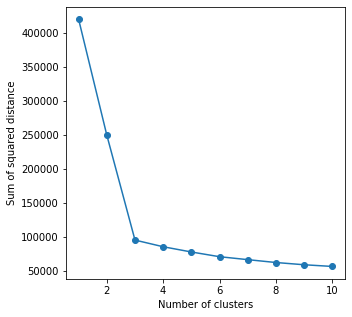

In [83]:
# elbow method
sse = []
list_k = list(range(1, 11))

for k in list_k:
    km = cluster.KMeans(n_clusters=k)
    km.fit(history.drop(['USER ID'], axis=1)) # we need to drop the first column(user id)
    sse.append(km.inertia_)

# Plot sse against k
plt.figure(figsize=(5, 5))
plt.plot(list_k, sse, '-o')
plt.xlabel('Number of clusters')
plt.ylabel('Sum of squared distance')
plt.show()

In [84]:
# According to elbow method, the best k should be 3
kmeans = cluster.KMeans(3) 
kmeans.fit(history.drop(['USER ID'], axis=1))
kmeans_y = kmeans.predict(history.drop(['USER ID'], axis=1))

In [85]:
# Seperate first 3000 users by their labels
# Create three arrays for each cluster/group of users
First_Group = []
Second_Group = []
Third_Group = []

for i in range(3000): 
    if kmeans.labels_[i] == 0:
        First_Group.append(history['USER ID'].iloc[i])
    if kmeans.labels_[i] == 1:
        Second_Group.append(history['USER ID'].iloc[i])
    if kmeans.labels_[i] == 2:
        Third_Group.append(history['USER ID'].iloc[i])
        
First_Group = np.asarray(First_Group)
Second_Group = np.asarray(Second_Group)
Third_Group = np.asarray(Third_Group)

In [86]:
print(First_Group)

[100976 101001 101021 ... 117457 117488 117517]


In [87]:
len(First_Group)

1009

In [88]:
len(Second_Group)

983

In [89]:
len(Third_Group)

1008

In [90]:

#--------------------PART2---------------------------
import numpy as np
import csv
import math
from collections import defaultdict


In [91]:
reformat = pd.read_csv('user_data.csv')
reformat.shape

(3000, 101)

In [92]:
ratings = pd.read_csv('user_ratings.csv')
ratings.shape
#history.head

(150062, 3)

In [93]:
from sklearn.model_selection import train_test_split

#According to 3 clusterings, split each USER_ID array into train/test arrays
First_Group_train, First_Group_test = train_test_split(First_Group, test_size=0.2)
Second_Group_train, Second_Group_test = train_test_split(Second_Group, test_size=0.2)
Third_Group_train, Third_Group_test = train_test_split(Third_Group, test_size=0.2)

#Sort again those arrays in ascending order
First_Group_train.sort()
First_Group_test.sort()
Second_Group_train.sort()
Second_Group_test.sort()
Third_Group_train.sort()
Third_Group_test.sort()


In [94]:
#Generate Three Dataframes corresponding to train/test arrays
Clstr1_train = reformat[reformat['USER_ID'].isin(First_Group_train)]
Clstr1_test = reformat[reformat['USER_ID'].isin(First_Group_test)]
Clstr2_train = reformat[reformat['USER_ID'].isin(Second_Group_train)]
Clstr2_test = reformat[reformat['USER_ID'].isin(Second_Group_test)]
Clstr3_train = reformat[reformat['USER_ID'].isin(Third_Group_train)]
Clstr3_test = reformat[reformat['USER_ID'].isin(Third_Group_test)]

print(Clstr3_test)

#print(Third_Group_train)
#len(Third_Group_train)
#type(Third_Group_train)

      USER_ID  alaska basil  alcohol future  alice ticket  alien potato  \
1      100955           6.0             4.0           NaN           5.0   
24     101083           NaN             4.0          10.0           NaN   
33     101143           9.0             NaN          10.0           NaN   
34     101147          10.0             NaN           0.0           2.0   
47     101208           8.0             NaN           7.0           3.0   
...       ...           ...             ...           ...           ...   
2908   116971           NaN             NaN           NaN           NaN   
2917   117029          10.0             NaN           NaN           4.0   
2919   117040           NaN             3.0           2.0           NaN   
2941   117190           NaN             4.0           6.0           4.0   
2952   117253           1.0             9.0           NaN           NaN   

      asia jacket  aztec iris  balance hostel  betty today  boston house  ...  \
1             NaN 

In [95]:
##Since the target products in each dataframes are the same: exacly as those 100 products,
##So we store those products into a list
target_products = list(reformat.columns) 
target_products.remove(target_products[0]) #remove the item 'USER_ID'
target_products = np.asarray(target_products)

#type(target_products)
print(target_products[3:5],len(target_products),type(target_products))
##After rechecking, we know that array is what we need.


['alien potato' 'asia jacket'] 100 <class 'numpy.ndarray'>


In [110]:

def load_rating_clusters(dataframe):
    users = []
    products = []
    ratings = []
    temp1 = dataframe.iloc[:,1:101]
    temp2 = np.array(temp1)
    rownumber = len(temp2)
    colnumber = temp2.shape[1]
    #Get ndArray of all column names 
    columnNames = list(dataframe.columns) 
    columnNames.remove(columnNames[0]) #remove the item 'USER_ID'
    columnNames = np.asarray(columnNames)
    #Get ndArray of all column names 
    rowNames = dataframe.iloc[:, 0]
    rowNames = np.array(rowNames)
    
    for i in range(rownumber): 
        for j in range(colnumber):
            users.append(rowNames[i])
            products.append(columnNames[j])
            ratings.append(temp2[i,j])
    #reformat3_ratings = np.array(reformat3_ratings)
    users = np.array(users)
    products = np.array(products)
    ratings = np.array(ratings)
    return users,products,ratings

users1_train,products1_train,ratings1_train = load_rating_clusters(Clstr1_train)
users1_test,products1_test,ratings1_test = load_rating_clusters(Clstr1_test)

def load_rating_data(file):
    csv_reader = csv.DictReader(file)
    users = []
    movies = []
    ratings = []
    for row in csv_reader:
        # We subtract 1 from the ids to get (0-based) indices
        users.append(int(row["userId"])-1)
        movies.append(int(row["movieId"])-1)
        ratings.append(float(row["rating"]))
    users = np.array(users)
    movies = np.array(movies)
    ratings = np.array(ratings)
    return users, movies, ratings

with open("ratings-train.csv") as train_file:
    train_users, train_movies, train_ratings = load_rating_data(train_file)
with open("ratings-test.csv") as test_file:
    test_users, test_movies, test_ratings = load_rating_data(test_file)

In [32]:
##size preparations for training
m1_train = len(ratings1_train) # the size of the training set of 1st clustering 
n1_users_train = max(First_Group_train)+1 # the largest index, plus 1
n_products = len(target_products)+1  #since we need to computer max(train_movies)+1 

##temprary we set:
learning_rate = 0.005
k = 10

##define initializae function
def initialize(n_users, n_movies, k):
    """Initalize a random model, and normalize it so that it has sensible mean and variance"""
    # (The normalization helps make sure we start out at a reasonable parameter scale, which speeds up training)
    user_features = np.random.normal(size=(n_users, k))
    movie_features = np.random.normal(size=(n_movies, k))
    raw_predictions = predict((user_features, movie_features))
    
    s = np.sqrt(2*raw_predictions.std()) # We want to start out with roughly unit variance
    b = np.sqrt((3.5 - raw_predictions.mean()/s)/k) #We want to start out with average rating 3.5
    user_features /= s
    user_features += b
    movie_features /= s
    movie_features += b
    
    return (user_features, movie_features)

sgd_model_Group1_train = initialize(n1_users_train, n_products, k)
#(sgd_model_Group1_train)



In [1]:
def predict(model):
    """The model's predictions for all user/movie pairs"""
    user_features, movie_features = model
    return user_features @ movie_features.T

def single_example_step(model, user, movie, rating):
    """Update the model using the gradient at a single training example"""
    user_features, movie_features = model
    residual = np.dot(user_features[user], movie_features[movie]) - rating
    grad_users = 2 * residual * movie_features[movie] # the gradient for the user_features matrix
    grad_movies = 2 * residual * user_features[user] # the gradient for the movie_features matrix
    user_features[user] -= learning_rate*grad_users
    movie_features[movie] -= learning_rate*grad_movies

def train_sgd(model, epochs):
    """Train the model for a number of epochs via SGD (batch size=1)"""
    user_features, movie_features = model
    # It's good practice to shuffle your data before doing batch gradient descent,
    # so that each mini-batch peforms like a random sample from the dataset
    shuffle = np.random.permutation(m1_train)     ##!!!notice the vari
    shuffled_users = train_users[shuffle]
    shuffled_movies = train_movies[shuffle]
    shuffled_ratings = train_ratings[shuffle]
    for epoch in range(epochs):
        for user, movie, rating in zip(shuffled_users, shuffled_movies, shuffled_ratings):
            # update the model using the gradient at a single example
            single_example_step(model, user, movie, rating)
        # after each Epoch, we'll evaluate our model
        predicted = predict(model)
        train_loss = np.mean((train_ratings - predicted[train_users, train_movies])**2)
        test_loss = np.mean((test_ratings - predicted[test_users, test_movies])**2)
        print("Loss after epoch #{} is: train/{} --- test/{}".format(epoch+1, train_loss, test_loss))

#train_sgd(sgd_model_Group1_train, 10)

In [ ]:
learning_rate = 0.005
#k = 10 # the number of features (for each user/movie)
m = len(ratings1_train) # the size of the training set
n_users = max(First_Group_train)+1 # the largest index, plus 1
n_movies = max(train_movies)+1

def initialize(n_users, n_movies, k):
    """Initalize a random model, and normalize it so that it has sensible mean and variance"""
    # (The normalization helps make sure we start out at a reasonable parameter scale, which speeds up training)
    user_features = np.random.normal(size=(n_users, k))
    movie_features = np.random.normal(size=(n_movies, k))
    raw_predictions = predict((user_features, movie_features))
    
    s = np.sqrt(2*raw_predictions.std()) # We want to start out with roughly unit variance
    b = np.sqrt((3.5 - raw_predictions.mean()/s)/k) #We want to start out with average rating 3.5
    user_features /= s
    user_features += b
    movie_features /= s
    movie_features += b
    
    return (user_features, movie_features)

def predict(model):
    """The model's predictions for all user/movie pairs"""
    user_features, movie_features = model
    return user_features @ movie_features.T

def single_example_step(model, user, movie, rating):
    """Update the model using the gradient at a single training example"""
    user_features, movie_features = model
    residual = np.dot(user_features[user], movie_features[movie]) - rating
    grad_users = 2 * residual * movie_features[movie] # the gradient for the user_features matrix
    grad_movies = 2 * residual * user_features[user] # the gradient for the movie_features matrix
    user_features[user] -= learning_rate*grad_users
    movie_features[movie] -= learning_rate*grad_movies

def train_sgd(model, epochs):
    """Train the model for a number of epochs via SGD (batch size=1)"""
    user_features, movie_features = model
    # It's good practice to shuffle your data before doing batch gradient descent,
    # so that each mini-batch peforms like a random sample from the dataset
    shuffle = np.random.permutation(m) 
    shuffled_users = train_users[shuffle]
    shuffled_movies = train_movies[shuffle]
    shuffled_ratings = train_ratings[shuffle]
    for epoch in range(epochs):
        for user, movie, rating in zip(shuffled_users, shuffled_movies, shuffled_ratings):
            # update the model using the gradient at a single example
            single_example_step(model, user, movie, rating)
        # after each Epoch, we'll evaluate our model
        predicted = predict(model)
        train_loss = np.mean((train_ratings - predicted[train_users, train_movies])**2)
        test_loss = np.mean((test_ratings - predicted[test_users, test_movies])**2)
        print("Loss after epoch #{} is: train/{} --- test/{}".format(epoch+1, train_loss, test_loss))

sgd_model = initialize(n_users, n_movies, k)
train_sgd(sgd_model, 10)

In [ ]:
learning_rate = 0.005

def initialize(n_users, n_products):
    """Initalize a random model, and normalize it so that it has sensible mean and variance"""
    # (The normalization helps make sure we start out at a reasonable parameter scale, which speeds up training)
    user_features = np.random.normal(size=(n_users,1))
    product_features = np.random.normal(size=(n_products,1))
    raw_predictions = predict((user_features, product_features))
    
    s = np.sqrt(2*raw_predictions.std()) # We want to start out with roughly unit variance
    b = np.sqrt(5 - raw_predictions.mean()/s) #We want to start out with average rating 5
    user_features /= s
    user_features += b
    product_features /= s
    product_features += b
    
    return (user_features, product_features)

def predict(model):
    """The model's predictions for all user/product pairs"""
    user_features, product_features = model
    return user_features @ product_features.T

def single_example_step(model, user, product, rating, train_users, train_products):
    """Update the model using the gradient at a single training example"""
    user_features, product_features = model
    residual = np.dot(user_features[np.argwhere(train_users==user)], product_features[np.argwhere(train_products==product)]) #- rating
    for i in range(len(residual)):
        residual[i]-=rating[i]
    grad_users = 2 * residual * product_features[np.argwhere(train_products==product)] # the gradient for the user_features matrix
    grad_products = 2 * residual * user_features[np.argwhere(train_users==user)] # the gradient for the product_features matrix
    print(grad_users.shape,grad_products.shape)
    #user_features[np.argwhere(train_users==user)] -= learning_rate*grad_users
    #product_features[np.argwhere(train_products==product)] -= learning_rate*grad_products

def train_sgd(model, epochs, train_users, train_products, train_ratings):
    """Train the model for a number of epochs via SGD (batch size=1)"""
    user_features, movie_features = model
    # It's good practice to shuffle your data before doing batch gradient descent,
    # so that each mini-batch peforms like a random sample from the dataset
    shuffle = np.random.permutation(len(train_ratings)) 
    shuffled_users = train_users[shuffle]
    shuffled_products = train_products[shuffle]
    shuffled_ratings = train_ratings[shuffle]
    for epoch in range(epochs):
        for user, product, rating in zip(shuffled_users, shuffled_products, shuffled_ratings):
            # update the model using the gradient at a single example
            single_example_step(model, user, product, rating, train_users, train_products)
        # after each Epoch, we'll evaluate our model
        """
        predicted = predict(model)
        train_loss = np.mean((train_ratings - predicted[train_users, train_products])**2)
        test_loss = np.mean((test_ratings - predicted[test_users, test_products])**2)
        print("Loss after epoch #{} is: train/{} --- test/{}".format(epoch+1, train_loss, test_loss))
        """

sgd_model_1 = initialize(len(First_Group), len(p1_train))
train_sgd(sgd_model_1, 10, First_Group, p1_train, r1_train)
sgd_model_2 = initialize(len(Second_Group), len(p2_train))
train_sgd(sgd_model_2, 10, Second_Group, p2_train, r2_train)
sgd_model_3 = initialize(len(Third_Group), len(p3_train))
train_sgd(sgd_model_3, 10, Third_Group, p3_train, r3_train)

In [18]:
def load_rating_clusters(dataset):
    reformat1_products = []
    reformat1_ratings = []
    reformat2_products = []
    reformat2_ratings = []
    reformat3_products = []
    reformat3_ratings = []
    
    for i in range(3000): 
        if kmeans.labels_[i] == 0:
            reformat1_products.append(dataset["PRODUCT"].iloc[i])
            reformat1_ratings.append(dataset["RATING"].iloc[i])
        if kmeans.labels_[i] == 1:
            reformat2_products.append(dataset["PRODUCT"].iloc[i])
            reformat2_ratings.append(dataset["RATING"].iloc[i])
        if kmeans.labels_[i] == 2:
            reformat3_products.append(dataset["PRODUCT"].iloc[i])
            reformat3_ratings.append(dataset["RATING"].iloc[i])
        
    reformat1_products = np.array(reformat1_products)
    reformat1_ratings = np.array(reformat1_ratings)
    reformat2_products = np.array(reformat2_products)
    reformat2_ratings = np.array(reformat2_ratings)
    reformat3_products = np.array(reformat3_products)
    reformat3_ratings = np.array(reformat3_ratings)
    return reformat1_products, reformat1_ratings, reformat2_products, reformat2_ratings, reformat3_products, reformat3_ratings

reformat1_products, reformat1_ratings, reformat2_products, reformat2_ratings, reformat3_products, reformat3_ratings = load_rating_clusters(ratings)

In [58]:
from sklearn.model_selection import train_test_split

p1_train, p1_test = train_test_split(First_Group, test_size=0.2)
p2_train, p2_test = train_test_split(Second_Group, test_size=0.2)
p3_train, p3_test = train_test_split(Thirs_Group, test_size=0.2)

r1_train=[]
r1_test=[]
r2_train=[]
r2_test=[]
r3_train=[]
r3_test=[]
for i in range(len(p1_train)):
    r1_train.append(reformat1_ratings[np.argwhere(reformat1_products==p1_train[i])])
for j in range(len(p2_train)):
    r2_train.append(reformat2_ratings[np.argwhere(reformat2_products==p2_train[j])])
for k in range(len(p3_train)):
    r3_train.append(reformat3_ratings[np.argwhere(reformat3_products==p3_train[k])])
for i in range(len(p1_test)):
    r1_test.append(reformat1_ratings[np.argwhere(reformat1_products==p1_test[i])])
for j in range(len(p2_test)):
    r2_test.append(reformat2_ratings[np.argwhere(reformat2_products==p2_test[j])])
for k in range(len(p3_test)):
    r3_test.append(reformat3_ratings[np.argwhere(reformat3_products==p3_test[k])])

r1_train = np.array(r1_train)
r2_train = np.array(r2_train)
r3_train = np.array(r3_train)
r1_test = np.array(r1_test)
r2_test = np.array(r2_test)
r3_test = np.array(r3_test)
print(p1_train.shape, p1_test.shape, r1_train.shape, r1_test.shape, p2_train.shape, p2_test.shape, r2_train.shape, r2_test.shape, p3_train.shape, p3_test.shape, r3_train.shape, r3_test.shape)

(786,) (197,) (786,) (197,) (807,) (202,) (807,) (202,) (806,) (202,) (806,) (202,)


In [55]:
print(len(p1_train),len(p1_test),len(r1_train),len(r1_test),len(p2_train),len(p2_test),len(r2_train),len(r2_test),len(p3_train),len(p3_test),len(r3_train),len(r3_test))

786 197 786 197 807 202 807 202 806 202 806 202


In [56]:
index1_train=[]
index2_train=[]
index3_train=[]

for i in range(len(p1_train)):
    index1_train.append(i)
for j in range(len(p2_train)):
    index2_train.append(j)
for k in range(len(p3_train)):
    index3_train.append(k)
print(index1_train, index2_train, index3_train)

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168, 169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 180, 181, 182, 183, 184, 185, 186, 187, 188, 189, 190, 191, 192, 193, 194, 195, 196, 197, 198, 199, 200, 201, 202, 203, 204, 205, 206, 207, 208, 209, 210, 211, 212, 213, 214, 215, 216, 217, 218, 219, 220, 221,

In [66]:
learning_rate = 0.005

def initialize(n_users, n_products):
    """Initalize a random model, and normalize it so that it has sensible mean and variance"""
    # (The normalization helps make sure we start out at a reasonable parameter scale, which speeds up training)
    user_features = np.random.normal(size=(n_users,1))
    product_features = np.random.normal(size=(n_products,1))
    raw_predictions = predict((user_features, product_features))
    
    s = np.sqrt(2*raw_predictions.std()) # We want to start out with roughly unit variance
    b = np.sqrt(5 - raw_predictions.mean()/s) #We want to start out with average rating 5
    user_features /= s
    user_features += b
    product_features /= s
    product_features += b
    
    return (user_features, product_features)

def predict(model):
    """The model's predictions for all user/product pairs"""
    user_features, product_features = model
    return user_features @ product_features.T

def single_example_step(model, user, product, rating, train_users, train_products):
    """Update the model using the gradient at a single training example"""
    user_features, product_features = model
    residual = np.dot(user_features[np.argwhere(train_users==user)], product_features[np.argwhere(train_products==product)]) #- rating
    for i in range(len(residual)):
        residual[i]-=rating[i]
    grad_users = 2 * residual * product_features[np.argwhere(train_products==product)] # the gradient for the user_features matrix
    grad_products = 2 * residual * user_features[np.argwhere(train_users==user)] # the gradient for the product_features matrix
    print(grad_users.shape,grad_products.shape)
    #user_features[np.argwhere(train_users==user)] -= learning_rate*grad_users
    #product_features[np.argwhere(train_products==product)] -= learning_rate*grad_products

def train_sgd(model, epochs, train_users, train_products, train_ratings):
    """Train the model for a number of epochs via SGD (batch size=1)"""
    user_features, movie_features = model
    # It's good practice to shuffle your data before doing batch gradient descent,
    # so that each mini-batch peforms like a random sample from the dataset
    shuffle = np.random.permutation(len(train_ratings)) 
    shuffled_users = train_users[shuffle]
    shuffled_products = train_products[shuffle]
    shuffled_ratings = train_ratings[shuffle]
    for epoch in range(epochs):
        for user, product, rating in zip(shuffled_users, shuffled_products, shuffled_ratings):
            # update the model using the gradient at a single example
            single_example_step(model, user, product, rating, train_users, train_products)
        # after each Epoch, we'll evaluate our model
        """
        predicted = predict(model)
        train_loss = np.mean((train_ratings - predicted[train_users, train_products])**2)
        test_loss = np.mean((test_ratings - predicted[test_users, test_products])**2)
        print("Loss after epoch #{} is: train/{} --- test/{}".format(epoch+1, train_loss, test_loss))
        """

sgd_model_1 = initialize(len(First_Group), len(p1_train))
train_sgd(sgd_model_1, 10, First_Group, p1_train, r1_train)
sgd_model_2 = initialize(len(Second_Group), len(p2_train))
train_sgd(sgd_model_2, 10, Second_Group, p2_train, r2_train)
sgd_model_3 = initialize(len(Third_Group), len(p3_train))
train_sgd(sgd_model_3, 10, Third_Group, p3_train, r3_train)

(1, 6, 6, 1) (1, 1, 6, 1)
(1, 11, 11, 1) (1, 1, 11, 1)
(1, 4, 4, 1) (1, 1, 4, 1)
(1, 7, 7, 1) (1, 1, 7, 1)
(1, 6, 6, 1) (1, 1, 6, 1)
(1, 13, 13, 1) (1, 1, 13, 1)
(1, 8, 8, 1) (1, 1, 8, 1)
(1, 9, 9, 1) (1, 1, 9, 1)
(1, 9, 9, 1) (1, 1, 9, 1)
(1, 11, 11, 1) (1, 1, 11, 1)
(1, 7, 7, 1) (1, 1, 7, 1)
(1, 6, 6, 1) (1, 1, 6, 1)
(1, 8, 8, 1) (1, 1, 8, 1)
(1, 8, 8, 1) (1, 1, 8, 1)
(1, 7, 7, 1) (1, 1, 7, 1)
(1, 7, 7, 1) (1, 1, 7, 1)
(1, 7, 7, 1) (1, 1, 7, 1)
(1, 9, 9, 1) (1, 1, 9, 1)
(1, 6, 6, 1) (1, 1, 6, 1)
(1, 14, 14, 1) (1, 1, 14, 1)
(1, 14, 14, 1) (1, 1, 14, 1)
(1, 5, 5, 1) (1, 1, 5, 1)
(1, 6, 6, 1) (1, 1, 6, 1)
(1, 10, 10, 1) (1, 1, 10, 1)
(1, 6, 6, 1) (1, 1, 6, 1)
(1, 8, 8, 1) (1, 1, 8, 1)
(1, 9, 9, 1) (1, 1, 9, 1)
(1, 10, 10, 1) (1, 1, 10, 1)
(1, 4, 4, 1) (1, 1, 4, 1)
(1, 9, 9, 1) (1, 1, 9, 1)
(1, 11, 11, 1) (1, 1, 11, 1)
(1, 11, 11, 1) (1, 1, 11, 1)
(1, 14, 14, 1) (1, 1, 14, 1)
(1, 6, 6, 1) (1, 1, 6, 1)
(1, 10, 10, 1) (1, 1, 10, 1)
(1, 7, 7, 1) (1, 1, 7, 1)
(1, 6, 6, 1) (1, 1, 6, 1)
(1, 7

(1, 11, 11, 1) (1, 1, 11, 1)
(1, 11, 11, 1) (1, 1, 11, 1)
(1, 7, 7, 1) (1, 1, 7, 1)
(1, 14, 14, 1) (1, 1, 14, 1)
(1, 11, 11, 1) (1, 1, 11, 1)
(1, 6, 6, 1) (1, 1, 6, 1)
(1, 13, 13, 1) (1, 1, 13, 1)
(1, 5, 5, 1) (1, 1, 5, 1)
(1, 10, 10, 1) (1, 1, 10, 1)
(1, 6, 6, 1) (1, 1, 6, 1)
(1, 10, 10, 1) (1, 1, 10, 1)
(1, 8, 8, 1) (1, 1, 8, 1)
(1, 10, 10, 1) (1, 1, 10, 1)
(1, 9, 9, 1) (1, 1, 9, 1)
(1, 10, 10, 1) (1, 1, 10, 1)
(1, 7, 7, 1) (1, 1, 7, 1)
(1, 7, 7, 1) (1, 1, 7, 1)
(1, 10, 10, 1) (1, 1, 10, 1)
(1, 11, 11, 1) (1, 1, 11, 1)
(1, 7, 7, 1) (1, 1, 7, 1)
(1, 5, 5, 1) (1, 1, 5, 1)
(1, 2, 2, 1) (1, 1, 2, 1)
(1, 11, 11, 1) (1, 1, 11, 1)
(1, 8, 8, 1) (1, 1, 8, 1)
(1, 4, 4, 1) (1, 1, 4, 1)
(1, 10, 10, 1) (1, 1, 10, 1)
(1, 8, 8, 1) (1, 1, 8, 1)
(1, 14, 14, 1) (1, 1, 14, 1)
(1, 6, 6, 1) (1, 1, 6, 1)
(1, 6, 6, 1) (1, 1, 6, 1)
(1, 7, 7, 1) (1, 1, 7, 1)
(1, 8, 8, 1) (1, 1, 8, 1)
(1, 4, 4, 1) (1, 1, 4, 1)
(1, 7, 7, 1) (1, 1, 7, 1)
(1, 7, 7, 1) (1, 1, 7, 1)
(1, 8, 8, 1) (1, 1, 8, 1)
(1, 8, 8, 1) (1, 1, 8,

(1, 9, 9, 1) (1, 1, 9, 1)
(1, 8, 8, 1) (1, 1, 8, 1)
(1, 7, 7, 1) (1, 1, 7, 1)
(1, 8, 8, 1) (1, 1, 8, 1)
(1, 10, 10, 1) (1, 1, 10, 1)
(1, 7, 7, 1) (1, 1, 7, 1)
(1, 10, 10, 1) (1, 1, 10, 1)
(1, 9, 9, 1) (1, 1, 9, 1)
(1, 7, 7, 1) (1, 1, 7, 1)
(1, 8, 8, 1) (1, 1, 8, 1)
(1, 11, 11, 1) (1, 1, 11, 1)
(1, 6, 6, 1) (1, 1, 6, 1)
(1, 13, 13, 1) (1, 1, 13, 1)
(1, 14, 14, 1) (1, 1, 14, 1)
(1, 7, 7, 1) (1, 1, 7, 1)
(1, 10, 10, 1) (1, 1, 10, 1)
(1, 7, 7, 1) (1, 1, 7, 1)
(1, 9, 9, 1) (1, 1, 9, 1)
(1, 8, 8, 1) (1, 1, 8, 1)
(1, 14, 14, 1) (1, 1, 14, 1)
(1, 3, 3, 1) (1, 1, 3, 1)
(1, 7, 7, 1) (1, 1, 7, 1)
(1, 8, 8, 1) (1, 1, 8, 1)
(1, 6, 6, 1) (1, 1, 6, 1)
(1, 11, 11, 1) (1, 1, 11, 1)
(1, 8, 8, 1) (1, 1, 8, 1)
(1, 7, 7, 1) (1, 1, 7, 1)
(1, 6, 6, 1) (1, 1, 6, 1)
(1, 6, 6, 1) (1, 1, 6, 1)
(1, 14, 14, 1) (1, 1, 14, 1)
(1, 7, 7, 1) (1, 1, 7, 1)
(1, 11, 11, 1) (1, 1, 11, 1)
(1, 13, 13, 1) (1, 1, 13, 1)
(1, 7, 7, 1) (1, 1, 7, 1)
(1, 9, 9, 1) (1, 1, 9, 1)
(1, 10, 10, 1) (1, 1, 10, 1)
(1, 8, 8, 1) (1, 1, 8, 1)
(1

(1, 8, 8, 1) (1, 1, 8, 1)
(1, 11, 11, 1) (1, 1, 11, 1)
(1, 6, 6, 1) (1, 1, 6, 1)
(1, 8, 8, 1) (1, 1, 8, 1)
(1, 10, 10, 1) (1, 1, 10, 1)
(1, 11, 11, 1) (1, 1, 11, 1)
(1, 8, 8, 1) (1, 1, 8, 1)
(1, 10, 10, 1) (1, 1, 10, 1)
(1, 7, 7, 1) (1, 1, 7, 1)
(1, 9, 9, 1) (1, 1, 9, 1)
(1, 14, 14, 1) (1, 1, 14, 1)
(1, 8, 8, 1) (1, 1, 8, 1)
(1, 4, 4, 1) (1, 1, 4, 1)
(1, 8, 8, 1) (1, 1, 8, 1)
(1, 8, 8, 1) (1, 1, 8, 1)
(1, 7, 7, 1) (1, 1, 7, 1)
(1, 7, 7, 1) (1, 1, 7, 1)
(1, 8, 8, 1) (1, 1, 8, 1)
(1, 8, 8, 1) (1, 1, 8, 1)
(1, 7, 7, 1) (1, 1, 7, 1)
(1, 7, 7, 1) (1, 1, 7, 1)
(1, 8, 8, 1) (1, 1, 8, 1)
(1, 8, 8, 1) (1, 1, 8, 1)
(1, 9, 9, 1) (1, 1, 9, 1)
(1, 8, 8, 1) (1, 1, 8, 1)
(1, 9, 9, 1) (1, 1, 9, 1)
(1, 8, 8, 1) (1, 1, 8, 1)
(1, 8, 8, 1) (1, 1, 8, 1)
(1, 9, 9, 1) (1, 1, 9, 1)
(1, 6, 6, 1) (1, 1, 6, 1)
(1, 11, 11, 1) (1, 1, 11, 1)
(1, 9, 9, 1) (1, 1, 9, 1)
(1, 14, 14, 1) (1, 1, 14, 1)
(1, 10, 10, 1) (1, 1, 10, 1)
(1, 8, 8, 1) (1, 1, 8, 1)
(1, 5, 5, 1) (1, 1, 5, 1)
(1, 7, 7, 1) (1, 1, 7, 1)
(1, 13, 13, 1)

(1, 10, 10, 1) (1, 1, 10, 1)
(1, 10, 10, 1) (1, 1, 10, 1)
(1, 8, 8, 1) (1, 1, 8, 1)
(1, 8, 8, 1) (1, 1, 8, 1)
(1, 7, 7, 1) (1, 1, 7, 1)
(1, 7, 7, 1) (1, 1, 7, 1)
(1, 8, 8, 1) (1, 1, 8, 1)
(1, 7, 7, 1) (1, 1, 7, 1)
(1, 8, 8, 1) (1, 1, 8, 1)
(1, 11, 11, 1) (1, 1, 11, 1)
(1, 7, 7, 1) (1, 1, 7, 1)
(1, 8, 8, 1) (1, 1, 8, 1)
(1, 11, 11, 1) (1, 1, 11, 1)
(1, 8, 8, 1) (1, 1, 8, 1)
(1, 10, 10, 1) (1, 1, 10, 1)
(1, 9, 9, 1) (1, 1, 9, 1)
(1, 10, 10, 1) (1, 1, 10, 1)
(1, 8, 8, 1) (1, 1, 8, 1)
(1, 7, 7, 1) (1, 1, 7, 1)
(1, 9, 9, 1) (1, 1, 9, 1)
(1, 7, 7, 1) (1, 1, 7, 1)
(1, 7, 7, 1) (1, 1, 7, 1)
(1, 8, 8, 1) (1, 1, 8, 1)
(1, 7, 7, 1) (1, 1, 7, 1)
(1, 10, 10, 1) (1, 1, 10, 1)
(1, 11, 11, 1) (1, 1, 11, 1)
(1, 9, 9, 1) (1, 1, 9, 1)
(1, 14, 14, 1) (1, 1, 14, 1)
(1, 8, 8, 1) (1, 1, 8, 1)
(1, 7, 7, 1) (1, 1, 7, 1)
(1, 9, 9, 1) (1, 1, 9, 1)
(1, 7, 7, 1) (1, 1, 7, 1)
(1, 6, 6, 1) (1, 1, 6, 1)
(1, 14, 14, 1) (1, 1, 14, 1)
(1, 9, 9, 1) (1, 1, 9, 1)
(1, 8, 8, 1) (1, 1, 8, 1)
(1, 6, 6, 1) (1, 1, 6, 1)
(1, 5, 5

(1, 12, 12, 1) (1, 1, 12, 1)
(1, 7, 7, 1) (1, 1, 7, 1)
(1, 11, 11, 1) (1, 1, 11, 1)
(1, 3, 3, 1) (1, 1, 3, 1)
(1, 14, 14, 1) (1, 1, 14, 1)
(1, 8, 8, 1) (1, 1, 8, 1)
(1, 11, 11, 1) (1, 1, 11, 1)
(1, 10, 10, 1) (1, 1, 10, 1)
(1, 8, 8, 1) (1, 1, 8, 1)
(1, 7, 7, 1) (1, 1, 7, 1)
(1, 8, 8, 1) (1, 1, 8, 1)
(1, 9, 9, 1) (1, 1, 9, 1)
(1, 10, 10, 1) (1, 1, 10, 1)
(1, 4, 4, 1) (1, 1, 4, 1)
(1, 7, 7, 1) (1, 1, 7, 1)
(1, 7, 7, 1) (1, 1, 7, 1)
(1, 8, 8, 1) (1, 1, 8, 1)
(1, 7, 7, 1) (1, 1, 7, 1)
(1, 13, 13, 1) (1, 1, 13, 1)
(1, 7, 7, 1) (1, 1, 7, 1)
(1, 8, 8, 1) (1, 1, 8, 1)
(1, 11, 11, 1) (1, 1, 11, 1)
(1, 7, 7, 1) (1, 1, 7, 1)
(1, 8, 8, 1) (1, 1, 8, 1)
(1, 4, 4, 1) (1, 1, 4, 1)
(1, 9, 9, 1) (1, 1, 9, 1)
(1, 7, 7, 1) (1, 1, 7, 1)
(1, 7, 7, 1) (1, 1, 7, 1)
(1, 7, 7, 1) (1, 1, 7, 1)
(1, 8, 8, 1) (1, 1, 8, 1)
(1, 8, 8, 1) (1, 1, 8, 1)
(1, 7, 7, 1) (1, 1, 7, 1)
(1, 9, 9, 1) (1, 1, 9, 1)
(1, 14, 14, 1) (1, 1, 14, 1)
(1, 5, 5, 1) (1, 1, 5, 1)
(1, 10, 10, 1) (1, 1, 10, 1)
(1, 10, 10, 1) (1, 1, 10, 1)
(1, 1

(1, 5, 5, 1) (1, 1, 5, 1)
(1, 6, 6, 1) (1, 1, 6, 1)
(1, 13, 13, 1) (1, 1, 13, 1)
(1, 9, 9, 1) (1, 1, 9, 1)
(1, 7, 7, 1) (1, 1, 7, 1)
(1, 11, 11, 1) (1, 1, 11, 1)
(1, 9, 9, 1) (1, 1, 9, 1)
(1, 8, 8, 1) (1, 1, 8, 1)
(1, 6, 6, 1) (1, 1, 6, 1)
(1, 7, 7, 1) (1, 1, 7, 1)
(1, 7, 7, 1) (1, 1, 7, 1)
(1, 8, 8, 1) (1, 1, 8, 1)
(1, 9, 9, 1) (1, 1, 9, 1)
(1, 8, 8, 1) (1, 1, 8, 1)
(1, 7, 7, 1) (1, 1, 7, 1)
(1, 9, 9, 1) (1, 1, 9, 1)
(1, 8, 8, 1) (1, 1, 8, 1)
(1, 10, 10, 1) (1, 1, 10, 1)
(1, 7, 7, 1) (1, 1, 7, 1)
(1, 10, 10, 1) (1, 1, 10, 1)
(1, 10, 10, 1) (1, 1, 10, 1)
(1, 5, 5, 1) (1, 1, 5, 1)
(1, 12, 12, 1) (1, 1, 12, 1)
(1, 8, 8, 1) (1, 1, 8, 1)
(1, 6, 6, 1) (1, 1, 6, 1)
(1, 8, 8, 1) (1, 1, 8, 1)
(1, 8, 8, 1) (1, 1, 8, 1)
(1, 8, 8, 1) (1, 1, 8, 1)
(1, 10, 10, 1) (1, 1, 10, 1)
(1, 8, 8, 1) (1, 1, 8, 1)
(1, 2, 2, 1) (1, 1, 2, 1)
(1, 8, 8, 1) (1, 1, 8, 1)
(1, 10, 10, 1) (1, 1, 10, 1)
(1, 13, 13, 1) (1, 1, 13, 1)
(1, 14, 14, 1) (1, 1, 14, 1)
(1, 13, 13, 1) (1, 1, 13, 1)
(1, 5, 5, 1) (1, 1, 5, 1)
(1, 1

(1, 8, 8, 1) (1, 1, 8, 1)
(1, 11, 11, 1) (1, 1, 11, 1)
(1, 7, 7, 1) (1, 1, 7, 1)
(1, 8, 8, 1) (1, 1, 8, 1)
(1, 14, 14, 1) (1, 1, 14, 1)
(1, 6, 6, 1) (1, 1, 6, 1)
(1, 7, 7, 1) (1, 1, 7, 1)
(1, 10, 10, 1) (1, 1, 10, 1)
(1, 7, 7, 1) (1, 1, 7, 1)
(1, 14, 14, 1) (1, 1, 14, 1)
(1, 8, 8, 1) (1, 1, 8, 1)
(1, 7, 7, 1) (1, 1, 7, 1)
(1, 7, 7, 1) (1, 1, 7, 1)
(1, 11, 11, 1) (1, 1, 11, 1)
(1, 8, 8, 1) (1, 1, 8, 1)
(1, 8, 8, 1) (1, 1, 8, 1)
(1, 7, 7, 1) (1, 1, 7, 1)
(1, 8, 8, 1) (1, 1, 8, 1)
(1, 11, 11, 1) (1, 1, 11, 1)
(1, 7, 7, 1) (1, 1, 7, 1)
(1, 5, 5, 1) (1, 1, 5, 1)
(1, 8, 8, 1) (1, 1, 8, 1)
(1, 8, 8, 1) (1, 1, 8, 1)
(1, 6, 6, 1) (1, 1, 6, 1)
(1, 7, 7, 1) (1, 1, 7, 1)
(1, 11, 11, 1) (1, 1, 11, 1)
(1, 10, 10, 1) (1, 1, 10, 1)
(1, 10, 10, 1) (1, 1, 10, 1)
(1, 8, 8, 1) (1, 1, 8, 1)
(1, 8, 8, 1) (1, 1, 8, 1)
(1, 10, 10, 1) (1, 1, 10, 1)
(1, 7, 7, 1) (1, 1, 7, 1)
(1, 11, 11, 1) (1, 1, 11, 1)
(1, 8, 8, 1) (1, 1, 8, 1)
(1, 10, 10, 1) (1, 1, 10, 1)
(1, 8, 8, 1) (1, 1, 8, 1)
(1, 10, 10, 1) (1, 1, 10, 1)

(1, 10, 10, 1) (1, 1, 10, 1)
(1, 8, 8, 1) (1, 1, 8, 1)
(1, 10, 10, 1) (1, 1, 10, 1)
(1, 9, 9, 1) (1, 1, 9, 1)
(1, 10, 10, 1) (1, 1, 10, 1)
(1, 7, 7, 1) (1, 1, 7, 1)
(1, 7, 7, 1) (1, 1, 7, 1)
(1, 10, 10, 1) (1, 1, 10, 1)
(1, 11, 11, 1) (1, 1, 11, 1)
(1, 7, 7, 1) (1, 1, 7, 1)
(1, 5, 5, 1) (1, 1, 5, 1)
(1, 2, 2, 1) (1, 1, 2, 1)
(1, 11, 11, 1) (1, 1, 11, 1)
(1, 8, 8, 1) (1, 1, 8, 1)
(1, 4, 4, 1) (1, 1, 4, 1)
(1, 10, 10, 1) (1, 1, 10, 1)
(1, 8, 8, 1) (1, 1, 8, 1)
(1, 14, 14, 1) (1, 1, 14, 1)
(1, 6, 6, 1) (1, 1, 6, 1)
(1, 6, 6, 1) (1, 1, 6, 1)
(1, 7, 7, 1) (1, 1, 7, 1)
(1, 8, 8, 1) (1, 1, 8, 1)
(1, 4, 4, 1) (1, 1, 4, 1)
(1, 7, 7, 1) (1, 1, 7, 1)
(1, 7, 7, 1) (1, 1, 7, 1)
(1, 8, 8, 1) (1, 1, 8, 1)
(1, 8, 8, 1) (1, 1, 8, 1)
(1, 5, 5, 1) (1, 1, 5, 1)
(1, 7, 7, 1) (1, 1, 7, 1)
(1, 14, 14, 1) (1, 1, 14, 1)
(1, 11, 11, 1) (1, 1, 11, 1)
(1, 6, 6, 1) (1, 1, 6, 1)
(1, 7, 7, 1) (1, 1, 7, 1)
(1, 9, 9, 1) (1, 1, 9, 1)
(1, 13, 13, 1) (1, 1, 13, 1)
(1, 7, 7, 1) (1, 1, 7, 1)
(1, 6, 6, 1) (1, 1, 6, 1)
(1, 9

(1, 10, 10, 1) (1, 1, 10, 1)
(1, 10, 10, 1) (1, 1, 10, 1)
(1, 5, 5, 1) (1, 1, 5, 1)
(1, 12, 12, 1) (1, 1, 12, 1)
(1, 8, 8, 1) (1, 1, 8, 1)
(1, 6, 6, 1) (1, 1, 6, 1)
(1, 8, 8, 1) (1, 1, 8, 1)
(1, 8, 8, 1) (1, 1, 8, 1)
(1, 8, 8, 1) (1, 1, 8, 1)
(1, 10, 10, 1) (1, 1, 10, 1)
(1, 8, 8, 1) (1, 1, 8, 1)
(1, 2, 2, 1) (1, 1, 2, 1)
(1, 8, 8, 1) (1, 1, 8, 1)
(1, 10, 10, 1) (1, 1, 10, 1)
(1, 13, 13, 1) (1, 1, 13, 1)
(1, 14, 14, 1) (1, 1, 14, 1)
(1, 13, 13, 1) (1, 1, 13, 1)
(1, 5, 5, 1) (1, 1, 5, 1)
(1, 11, 11, 1) (1, 1, 11, 1)
(1, 11, 11, 1) (1, 1, 11, 1)
(1, 9, 9, 1) (1, 1, 9, 1)
(1, 8, 8, 1) (1, 1, 8, 1)
(1, 14, 14, 1) (1, 1, 14, 1)
(1, 7, 7, 1) (1, 1, 7, 1)
(1, 6, 6, 1) (1, 1, 6, 1)
(1, 6, 6, 1) (1, 1, 6, 1)
(1, 7, 7, 1) (1, 1, 7, 1)
(1, 9, 9, 1) (1, 1, 9, 1)
(1, 14, 14, 1) (1, 1, 14, 1)
(1, 7, 7, 1) (1, 1, 7, 1)
(1, 5, 5, 1) (1, 1, 5, 1)
(1, 7, 7, 1) (1, 1, 7, 1)
(1, 11, 11, 1) (1, 1, 11, 1)
(1, 10, 10, 1) (1, 1, 10, 1)
(1, 10, 10, 1) (1, 1, 10, 1)
(1, 8, 8, 1) (1, 1, 8, 1)
(1, 8, 8, 1) (1, 1,

(1, 7, 7, 1) (1, 1, 7, 1)
(1, 10, 10, 1) (1, 1, 10, 1)
(1, 11, 11, 1) (1, 1, 11, 1)
(1, 9, 9, 1) (1, 1, 9, 1)
(1, 14, 14, 1) (1, 1, 14, 1)
(1, 8, 8, 1) (1, 1, 8, 1)
(1, 7, 7, 1) (1, 1, 7, 1)
(1, 9, 9, 1) (1, 1, 9, 1)
(1, 7, 7, 1) (1, 1, 7, 1)
(1, 6, 6, 1) (1, 1, 6, 1)
(1, 14, 14, 1) (1, 1, 14, 1)
(1, 9, 9, 1) (1, 1, 9, 1)
(1, 8, 8, 1) (1, 1, 8, 1)
(1, 6, 6, 1) (1, 1, 6, 1)
(1, 5, 5, 1) (1, 1, 5, 1)
(1, 12, 12, 1) (1, 1, 12, 1)
(1, 6, 6, 1) (1, 1, 6, 1)
(1, 10, 10, 1) (1, 1, 10, 1)
(1, 7, 7, 1) (1, 1, 7, 1)
(1, 9, 9, 1) (1, 1, 9, 1)
(1, 7, 7, 1) (1, 1, 7, 1)
(1, 7, 7, 1) (1, 1, 7, 1)
(1, 9, 9, 1) (1, 1, 9, 1)
(1, 14, 14, 1) (1, 1, 14, 1)
(1, 14, 14, 1) (1, 1, 14, 1)
(1, 4, 4, 1) (1, 1, 4, 1)
(1, 14, 14, 1) (1, 1, 14, 1)
(1, 10, 10, 1) (1, 1, 10, 1)
(1, 10, 10, 1) (1, 1, 10, 1)
(1, 6, 6, 1) (1, 1, 6, 1)
(1, 10, 10, 1) (1, 1, 10, 1)
(1, 7, 7, 1) (1, 1, 7, 1)
(1, 6, 6, 1) (1, 1, 6, 1)
(1, 5, 5, 1) (1, 1, 5, 1)
(1, 9, 9, 1) (1, 1, 9, 1)
(1, 7, 7, 1) (1, 1, 7, 1)
(1, 11, 11, 1) (1, 1, 11, 1)

(1, 6, 6, 1) (1, 1, 6, 1)
(1, 8, 8, 1) (1, 1, 8, 1)
(1, 8, 8, 1) (1, 1, 8, 1)
(1, 8, 8, 1) (1, 1, 8, 1)
(1, 10, 10, 1) (1, 1, 10, 1)
(1, 8, 8, 1) (1, 1, 8, 1)
(1, 2, 2, 1) (1, 1, 2, 1)
(1, 8, 8, 1) (1, 1, 8, 1)
(1, 10, 10, 1) (1, 1, 10, 1)
(1, 13, 13, 1) (1, 1, 13, 1)
(1, 14, 14, 1) (1, 1, 14, 1)
(1, 13, 13, 1) (1, 1, 13, 1)
(1, 5, 5, 1) (1, 1, 5, 1)
(1, 11, 11, 1) (1, 1, 11, 1)
(1, 11, 11, 1) (1, 1, 11, 1)
(1, 9, 9, 1) (1, 1, 9, 1)
(1, 8, 8, 1) (1, 1, 8, 1)
(1, 14, 14, 1) (1, 1, 14, 1)
(1, 7, 7, 1) (1, 1, 7, 1)
(1, 6, 6, 1) (1, 1, 6, 1)
(1, 6, 6, 1) (1, 1, 6, 1)
(1, 7, 7, 1) (1, 1, 7, 1)
(1, 9, 9, 1) (1, 1, 9, 1)
(1, 14, 14, 1) (1, 1, 14, 1)
(1, 7, 7, 1) (1, 1, 7, 1)
(1, 5, 5, 1) (1, 1, 5, 1)
(1, 7, 7, 1) (1, 1, 7, 1)
(1, 11, 11, 1) (1, 1, 11, 1)
(1, 10, 10, 1) (1, 1, 10, 1)
(1, 10, 10, 1) (1, 1, 10, 1)
(1, 8, 8, 1) (1, 1, 8, 1)
(1, 8, 8, 1) (1, 1, 8, 1)
(1, 3, 3, 1) (1, 1, 3, 1)
(1, 10, 10, 1) (1, 1, 10, 1)
(1, 7, 7, 1) (1, 1, 7, 1)
(1, 5, 5, 1) (1, 1, 5, 1)
(1, 8, 8, 1) (1, 1, 8, 1)

(1, 6, 6, 1) (1, 1, 6, 1)
(1, 8, 8, 1) (1, 1, 8, 1)
(1, 8, 8, 1) (1, 1, 8, 1)
(1, 13, 13, 1) (1, 1, 13, 1)
(1, 10, 10, 1) (1, 1, 10, 1)
(1, 7, 7, 1) (1, 1, 7, 1)
(1, 8, 8, 1) (1, 1, 8, 1)
(1, 6, 6, 1) (1, 1, 6, 1)
(1, 11, 11, 1) (1, 1, 11, 1)
(1, 14, 14, 1) (1, 1, 14, 1)
(1, 9, 9, 1) (1, 1, 9, 1)
(1, 10, 10, 1) (1, 1, 10, 1)
(1, 10, 10, 1) (1, 1, 10, 1)
(1, 10, 10, 1) (1, 1, 10, 1)
(1, 8, 8, 1) (1, 1, 8, 1)
(1, 11, 11, 1) (1, 1, 11, 1)
(1, 11, 11, 1) (1, 1, 11, 1)
(1, 8, 8, 1) (1, 1, 8, 1)
(1, 4, 4, 1) (1, 1, 4, 1)
(1, 8, 8, 1) (1, 1, 8, 1)
(1, 3, 3, 1) (1, 1, 3, 1)
(1, 11, 11, 1) (1, 1, 11, 1)
(1, 14, 14, 1) (1, 1, 14, 1)
(1, 11, 11, 1) (1, 1, 11, 1)
(1, 6, 6, 1) (1, 1, 6, 1)
(1, 7, 7, 1) (1, 1, 7, 1)
(1, 10, 10, 1) (1, 1, 10, 1)
(1, 11, 11, 1) (1, 1, 11, 1)
(1, 11, 11, 1) (1, 1, 11, 1)
(1, 4, 4, 1) (1, 1, 4, 1)
(1, 8, 8, 1) (1, 1, 8, 1)
(1, 11, 11, 1) (1, 1, 11, 1)
(1, 7, 7, 1) (1, 1, 7, 1)
(1, 8, 8, 1) (1, 1, 8, 1)
(1, 14, 14, 1) (1, 1, 14, 1)
(1, 6, 6, 1) (1, 1, 6, 1)
(1, 7, 7, 1) 

(1, 8, 8, 1) (1, 1, 8, 1)
(1, 6, 6, 1) (1, 1, 6, 1)
(1, 6, 6, 1) (1, 1, 6, 1)
(1, 7, 7, 1) (1, 1, 7, 1)
(1, 10, 10, 1) (1, 1, 10, 1)
(1, 14, 14, 1) (1, 1, 14, 1)
(1, 13, 13, 1) (1, 1, 13, 1)
(1, 7, 7, 1) (1, 1, 7, 1)
(1, 14, 14, 1) (1, 1, 14, 1)
(1, 7, 7, 1) (1, 1, 7, 1)
(1, 8, 8, 1) (1, 1, 8, 1)
(1, 6, 6, 1) (1, 1, 6, 1)
(1, 8, 8, 1) (1, 1, 8, 1)
(1, 7, 7, 1) (1, 1, 7, 1)
(1, 7, 7, 1) (1, 1, 7, 1)
(1, 6, 6, 1) (1, 1, 6, 1)
(1, 6, 6, 1) (1, 1, 6, 1)
(1, 9, 9, 1) (1, 1, 9, 1)
(1, 4, 4, 1) (1, 1, 4, 1)
(1, 8, 8, 1) (1, 1, 8, 1)
(1, 7, 7, 1) (1, 1, 7, 1)
(1, 11, 11, 1) (1, 1, 11, 1)
(1, 13, 13, 1) (1, 1, 13, 1)
(1, 11, 11, 1) (1, 1, 11, 1)
(1, 10, 10, 1) (1, 1, 10, 1)
(1, 14, 14, 1) (1, 1, 14, 1)
(1, 10, 10, 1) (1, 1, 10, 1)
(1, 11, 11, 1) (1, 1, 11, 1)
(1, 7, 7, 1) (1, 1, 7, 1)
(1, 9, 9, 1) (1, 1, 9, 1)
(1, 10, 10, 1) (1, 1, 10, 1)
(1, 11, 11, 1) (1, 1, 11, 1)
(1, 14, 14, 1) (1, 1, 14, 1)
(1, 11, 11, 1) (1, 1, 11, 1)
(1, 6, 6, 1) (1, 1, 6, 1)
(1, 8, 8, 1) (1, 1, 8, 1)
(1, 8, 8, 1) (1, 1,

(1, 7, 7, 1) (1, 1, 7, 1)
(1, 14, 14, 1) (1, 1, 14, 1)
(1, 7, 7, 1) (1, 1, 7, 1)
(1, 11, 11, 1) (1, 1, 11, 1)
(1, 11, 11, 1) (1, 1, 11, 1)
(1, 8, 8, 1) (1, 1, 8, 1)
(1, 14, 14, 1) (1, 1, 14, 1)
(1, 8, 8, 1) (1, 1, 8, 1)
(1, 8, 8, 1) (1, 1, 8, 1)
(1, 7, 7, 1) (1, 1, 7, 1)
(1, 14, 14, 1) (1, 1, 14, 1)
(1, 8, 8, 1) (1, 1, 8, 1)
(1, 6, 6, 1) (1, 1, 6, 1)
(1, 11, 11, 1) (1, 1, 11, 1)
(1, 4, 4, 1) (1, 1, 4, 1)
(1, 7, 7, 1) (1, 1, 7, 1)
(1, 6, 6, 1) (1, 1, 6, 1)
(1, 13, 13, 1) (1, 1, 13, 1)
(1, 8, 8, 1) (1, 1, 8, 1)
(1, 9, 9, 1) (1, 1, 9, 1)
(1, 9, 9, 1) (1, 1, 9, 1)
(1, 11, 11, 1) (1, 1, 11, 1)
(1, 7, 7, 1) (1, 1, 7, 1)
(1, 6, 6, 1) (1, 1, 6, 1)
(1, 8, 8, 1) (1, 1, 8, 1)
(1, 8, 8, 1) (1, 1, 8, 1)
(1, 7, 7, 1) (1, 1, 7, 1)
(1, 7, 7, 1) (1, 1, 7, 1)
(1, 7, 7, 1) (1, 1, 7, 1)
(1, 9, 9, 1) (1, 1, 9, 1)
(1, 6, 6, 1) (1, 1, 6, 1)
(1, 14, 14, 1) (1, 1, 14, 1)
(1, 14, 14, 1) (1, 1, 14, 1)
(1, 5, 5, 1) (1, 1, 5, 1)
(1, 6, 6, 1) (1, 1, 6, 1)
(1, 10, 10, 1) (1, 1, 10, 1)
(1, 6, 6, 1) (1, 1, 6, 1)
(1, 8

(1, 9, 9, 1) (1, 1, 9, 1)
(1, 7, 7, 1) (1, 1, 7, 1)
(1, 7, 7, 1) (1, 1, 7, 1)
(1, 8, 8, 1) (1, 1, 8, 1)
(1, 7, 7, 1) (1, 1, 7, 1)
(1, 10, 10, 1) (1, 1, 10, 1)
(1, 11, 11, 1) (1, 1, 11, 1)
(1, 9, 9, 1) (1, 1, 9, 1)
(1, 14, 14, 1) (1, 1, 14, 1)
(1, 8, 8, 1) (1, 1, 8, 1)
(1, 7, 7, 1) (1, 1, 7, 1)
(1, 9, 9, 1) (1, 1, 9, 1)
(1, 7, 7, 1) (1, 1, 7, 1)
(1, 6, 6, 1) (1, 1, 6, 1)
(1, 14, 14, 1) (1, 1, 14, 1)
(1, 9, 9, 1) (1, 1, 9, 1)
(1, 8, 8, 1) (1, 1, 8, 1)
(1, 6, 6, 1) (1, 1, 6, 1)
(1, 5, 5, 1) (1, 1, 5, 1)
(1, 12, 12, 1) (1, 1, 12, 1)
(1, 6, 6, 1) (1, 1, 6, 1)
(1, 10, 10, 1) (1, 1, 10, 1)
(1, 7, 7, 1) (1, 1, 7, 1)
(1, 9, 9, 1) (1, 1, 9, 1)
(1, 7, 7, 1) (1, 1, 7, 1)
(1, 7, 7, 1) (1, 1, 7, 1)
(1, 9, 9, 1) (1, 1, 9, 1)
(1, 14, 14, 1) (1, 1, 14, 1)
(1, 14, 14, 1) (1, 1, 14, 1)
(1, 4, 4, 1) (1, 1, 4, 1)
(1, 14, 14, 1) (1, 1, 14, 1)
(1, 10, 10, 1) (1, 1, 10, 1)
(1, 10, 10, 1) (1, 1, 10, 1)
(1, 6, 6, 1) (1, 1, 6, 1)
(1, 10, 10, 1) (1, 1, 10, 1)
(1, 7, 7, 1) (1, 1, 7, 1)
(1, 6, 6, 1) (1, 1, 6, 1)
(1

(1, 9, 9, 1) (1, 1, 9, 1)
(1, 9, 9, 1) (1, 1, 9, 1)
(1, 9, 9, 1) (1, 1, 9, 1)
(1, 11, 11, 1) (1, 1, 11, 1)
(1, 10, 10, 1) (1, 1, 10, 1)
(1, 6, 6, 1) (1, 1, 6, 1)
(1, 10, 10, 1) (1, 1, 10, 1)
(1, 7, 7, 1) (1, 1, 7, 1)
(1, 11, 11, 1) (1, 1, 11, 1)
(1, 8, 8, 1) (1, 1, 8, 1)
(1, 7, 7, 1) (1, 1, 7, 1)
(1, 11, 11, 1) (1, 1, 11, 1)
(1, 10, 10, 1) (1, 1, 10, 1)
(1, 7, 7, 1) (1, 1, 7, 1)
(1, 10, 10, 1) (1, 1, 10, 1)
(1, 9, 9, 1) (1, 1, 9, 1)
(1, 5, 5, 1) (1, 1, 5, 1)
(1, 7, 7, 1) (1, 1, 7, 1)
(1, 11, 11, 1) (1, 1, 11, 1)
(1, 9, 9, 1) (1, 1, 9, 1)
(1, 8, 8, 1) (1, 1, 8, 1)
(1, 9, 9, 1) (1, 1, 9, 1)
(1, 5, 5, 1) (1, 1, 5, 1)
(1, 5, 5, 1) (1, 1, 5, 1)
(1, 7, 7, 1) (1, 1, 7, 1)
(1, 9, 9, 1) (1, 1, 9, 1)
(1, 10, 10, 1) (1, 1, 10, 1)
(1, 6, 6, 1) (1, 1, 6, 1)
(1, 8, 8, 1) (1, 1, 8, 1)
(1, 9, 9, 1) (1, 1, 9, 1)
(1, 8, 8, 1) (1, 1, 8, 1)
(1, 6, 6, 1) (1, 1, 6, 1)
(1, 8, 8, 1) (1, 1, 8, 1)
(1, 8, 8, 1) (1, 1, 8, 1)
(1, 7, 7, 1) (1, 1, 7, 1)
(1, 10, 10, 1) (1, 1, 10, 1)
(1, 6, 6, 1) (1, 1, 6, 1)
(1, 6, 6

(1, 9, 9, 1) (1, 1, 9, 1)
(1, 10, 10, 1) (1, 1, 10, 1)
(1, 11, 11, 1) (1, 1, 11, 1)
(1, 12, 12, 1) (1, 1, 12, 1)
(1, 5, 5, 1) (1, 1, 5, 1)
(1, 9, 9, 1) (1, 1, 9, 1)
(1, 13, 13, 1) (1, 1, 13, 1)
(1, 11, 11, 1) (1, 1, 11, 1)
(1, 8, 8, 1) (1, 1, 8, 1)
(1, 8, 8, 1) (1, 1, 8, 1)
(1, 7, 7, 1) (1, 1, 7, 1)
(1, 8, 8, 1) (1, 1, 8, 1)
(1, 12, 12, 1) (1, 1, 12, 1)
(1, 11, 11, 1) (1, 1, 11, 1)
(1, 8, 8, 1) (1, 1, 8, 1)
(1, 11, 11, 1) (1, 1, 11, 1)
(1, 8, 8, 1) (1, 1, 8, 1)
(1, 5, 5, 1) (1, 1, 5, 1)
(1, 8, 8, 1) (1, 1, 8, 1)
(1, 9, 9, 1) (1, 1, 9, 1)
(1, 9, 9, 1) (1, 1, 9, 1)
(1, 8, 8, 1) (1, 1, 8, 1)
(1, 8, 8, 1) (1, 1, 8, 1)
(1, 12, 12, 1) (1, 1, 12, 1)
(1, 9, 9, 1) (1, 1, 9, 1)
(1, 8, 8, 1) (1, 1, 8, 1)
(1, 12, 12, 1) (1, 1, 12, 1)
(1, 12, 12, 1) (1, 1, 12, 1)
(1, 8, 8, 1) (1, 1, 8, 1)
(1, 11, 11, 1) (1, 1, 11, 1)
(1, 6, 6, 1) (1, 1, 6, 1)
(1, 7, 7, 1) (1, 1, 7, 1)
(1, 10, 10, 1) (1, 1, 10, 1)
(1, 8, 8, 1) (1, 1, 8, 1)
(1, 8, 8, 1) (1, 1, 8, 1)
(1, 9, 9, 1) (1, 1, 9, 1)
(1, 10, 10, 1) (1, 1, 10,

(1, 12, 12, 1) (1, 1, 12, 1)
(1, 10, 10, 1) (1, 1, 10, 1)
(1, 12, 12, 1) (1, 1, 12, 1)
(1, 10, 10, 1) (1, 1, 10, 1)
(1, 8, 8, 1) (1, 1, 8, 1)
(1, 10, 10, 1) (1, 1, 10, 1)
(1, 9, 9, 1) (1, 1, 9, 1)
(1, 10, 10, 1) (1, 1, 10, 1)
(1, 11, 11, 1) (1, 1, 11, 1)
(1, 12, 12, 1) (1, 1, 12, 1)
(1, 9, 9, 1) (1, 1, 9, 1)
(1, 4, 4, 1) (1, 1, 4, 1)
(1, 10, 10, 1) (1, 1, 10, 1)
(1, 10, 10, 1) (1, 1, 10, 1)
(1, 7, 7, 1) (1, 1, 7, 1)
(1, 9, 9, 1) (1, 1, 9, 1)
(1, 13, 13, 1) (1, 1, 13, 1)
(1, 8, 8, 1) (1, 1, 8, 1)
(1, 6, 6, 1) (1, 1, 6, 1)
(1, 9, 9, 1) (1, 1, 9, 1)
(1, 5, 5, 1) (1, 1, 5, 1)
(1, 7, 7, 1) (1, 1, 7, 1)
(1, 10, 10, 1) (1, 1, 10, 1)
(1, 8, 8, 1) (1, 1, 8, 1)
(1, 9, 9, 1) (1, 1, 9, 1)
(1, 11, 11, 1) (1, 1, 11, 1)
(1, 7, 7, 1) (1, 1, 7, 1)
(1, 11, 11, 1) (1, 1, 11, 1)
(1, 4, 4, 1) (1, 1, 4, 1)
(1, 8, 8, 1) (1, 1, 8, 1)
(1, 5, 5, 1) (1, 1, 5, 1)
(1, 8, 8, 1) (1, 1, 8, 1)
(1, 6, 6, 1) (1, 1, 6, 1)
(1, 10, 10, 1) (1, 1, 10, 1)
(1, 7, 7, 1) (1, 1, 7, 1)
(1, 5, 5, 1) (1, 1, 5, 1)
(1, 6, 6, 1) (1, 1,

(1, 7, 7, 1) (1, 1, 7, 1)
(1, 9, 9, 1) (1, 1, 9, 1)
(1, 3, 3, 1) (1, 1, 3, 1)
(1, 11, 11, 1) (1, 1, 11, 1)
(1, 9, 9, 1) (1, 1, 9, 1)
(1, 9, 9, 1) (1, 1, 9, 1)
(1, 12, 12, 1) (1, 1, 12, 1)
(1, 9, 9, 1) (1, 1, 9, 1)
(1, 11, 11, 1) (1, 1, 11, 1)
(1, 11, 11, 1) (1, 1, 11, 1)
(1, 8, 8, 1) (1, 1, 8, 1)
(1, 10, 10, 1) (1, 1, 10, 1)
(1, 6, 6, 1) (1, 1, 6, 1)
(1, 6, 6, 1) (1, 1, 6, 1)
(1, 9, 9, 1) (1, 1, 9, 1)
(1, 6, 6, 1) (1, 1, 6, 1)
(1, 9, 9, 1) (1, 1, 9, 1)
(1, 9, 9, 1) (1, 1, 9, 1)
(1, 9, 9, 1) (1, 1, 9, 1)
(1, 6, 6, 1) (1, 1, 6, 1)
(1, 8, 8, 1) (1, 1, 8, 1)
(1, 11, 11, 1) (1, 1, 11, 1)
(1, 12, 12, 1) (1, 1, 12, 1)
(1, 12, 12, 1) (1, 1, 12, 1)
(1, 7, 7, 1) (1, 1, 7, 1)
(1, 5, 5, 1) (1, 1, 5, 1)
(1, 6, 6, 1) (1, 1, 6, 1)
(1, 10, 10, 1) (1, 1, 10, 1)
(1, 9, 9, 1) (1, 1, 9, 1)
(1, 6, 6, 1) (1, 1, 6, 1)
(1, 8, 8, 1) (1, 1, 8, 1)
(1, 8, 8, 1) (1, 1, 8, 1)
(1, 7, 7, 1) (1, 1, 7, 1)
(1, 8, 8, 1) (1, 1, 8, 1)
(1, 8, 8, 1) (1, 1, 8, 1)
(1, 7, 7, 1) (1, 1, 7, 1)
(1, 11, 11, 1) (1, 1, 11, 1)
(1, 9, 9

(1, 9, 9, 1) (1, 1, 9, 1)
(1, 12, 12, 1) (1, 1, 12, 1)
(1, 8, 8, 1) (1, 1, 8, 1)
(1, 8, 8, 1) (1, 1, 8, 1)
(1, 10, 10, 1) (1, 1, 10, 1)
(1, 10, 10, 1) (1, 1, 10, 1)
(1, 7, 7, 1) (1, 1, 7, 1)
(1, 10, 10, 1) (1, 1, 10, 1)
(1, 10, 10, 1) (1, 1, 10, 1)
(1, 10, 10, 1) (1, 1, 10, 1)
(1, 8, 8, 1) (1, 1, 8, 1)
(1, 6, 6, 1) (1, 1, 6, 1)
(1, 12, 12, 1) (1, 1, 12, 1)
(1, 9, 9, 1) (1, 1, 9, 1)
(1, 9, 9, 1) (1, 1, 9, 1)
(1, 13, 13, 1) (1, 1, 13, 1)
(1, 10, 10, 1) (1, 1, 10, 1)
(1, 13, 13, 1) (1, 1, 13, 1)
(1, 4, 4, 1) (1, 1, 4, 1)
(1, 12, 12, 1) (1, 1, 12, 1)
(1, 10, 10, 1) (1, 1, 10, 1)
(1, 11, 11, 1) (1, 1, 11, 1)
(1, 12, 12, 1) (1, 1, 12, 1)
(1, 8, 8, 1) (1, 1, 8, 1)
(1, 8, 8, 1) (1, 1, 8, 1)
(1, 6, 6, 1) (1, 1, 6, 1)
(1, 8, 8, 1) (1, 1, 8, 1)
(1, 8, 8, 1) (1, 1, 8, 1)
(1, 10, 10, 1) (1, 1, 10, 1)
(1, 9, 9, 1) (1, 1, 9, 1)
(1, 9, 9, 1) (1, 1, 9, 1)
(1, 10, 10, 1) (1, 1, 10, 1)
(1, 10, 10, 1) (1, 1, 10, 1)
(1, 8, 8, 1) (1, 1, 8, 1)
(1, 8, 8, 1) (1, 1, 8, 1)
(1, 7, 7, 1) (1, 1, 7, 1)
(1, 9, 9, 1) 

(1, 7, 7, 1) (1, 1, 7, 1)
(1, 7, 7, 1) (1, 1, 7, 1)
(1, 9, 9, 1) (1, 1, 9, 1)
(1, 6, 6, 1) (1, 1, 6, 1)
(1, 10, 10, 1) (1, 1, 10, 1)
(1, 11, 11, 1) (1, 1, 11, 1)
(1, 8, 8, 1) (1, 1, 8, 1)
(1, 6, 6, 1) (1, 1, 6, 1)
(1, 7, 7, 1) (1, 1, 7, 1)
(1, 10, 10, 1) (1, 1, 10, 1)
(1, 9, 9, 1) (1, 1, 9, 1)
(1, 9, 9, 1) (1, 1, 9, 1)
(1, 9, 9, 1) (1, 1, 9, 1)
(1, 11, 11, 1) (1, 1, 11, 1)
(1, 7, 7, 1) (1, 1, 7, 1)
(1, 9, 9, 1) (1, 1, 9, 1)
(1, 7, 7, 1) (1, 1, 7, 1)
(1, 8, 8, 1) (1, 1, 8, 1)
(1, 12, 12, 1) (1, 1, 12, 1)
(1, 12, 12, 1) (1, 1, 12, 1)
(1, 11, 11, 1) (1, 1, 11, 1)
(1, 11, 11, 1) (1, 1, 11, 1)
(1, 8, 8, 1) (1, 1, 8, 1)
(1, 7, 7, 1) (1, 1, 7, 1)
(1, 11, 11, 1) (1, 1, 11, 1)
(1, 7, 7, 1) (1, 1, 7, 1)
(1, 11, 11, 1) (1, 1, 11, 1)
(1, 10, 10, 1) (1, 1, 10, 1)
(1, 10, 10, 1) (1, 1, 10, 1)
(1, 12, 12, 1) (1, 1, 12, 1)
(1, 8, 8, 1) (1, 1, 8, 1)
(1, 12, 12, 1) (1, 1, 12, 1)
(1, 7, 7, 1) (1, 1, 7, 1)
(1, 7, 7, 1) (1, 1, 7, 1)
(1, 12, 12, 1) (1, 1, 12, 1)
(1, 8, 8, 1) (1, 1, 8, 1)
(1, 8, 8, 1) (1, 1,

(1, 9, 9, 1) (1, 1, 9, 1)
(1, 9, 9, 1) (1, 1, 9, 1)
(1, 11, 11, 1) (1, 1, 11, 1)
(1, 10, 10, 1) (1, 1, 10, 1)
(1, 6, 6, 1) (1, 1, 6, 1)
(1, 10, 10, 1) (1, 1, 10, 1)
(1, 7, 7, 1) (1, 1, 7, 1)
(1, 11, 11, 1) (1, 1, 11, 1)
(1, 8, 8, 1) (1, 1, 8, 1)
(1, 7, 7, 1) (1, 1, 7, 1)
(1, 11, 11, 1) (1, 1, 11, 1)
(1, 10, 10, 1) (1, 1, 10, 1)
(1, 7, 7, 1) (1, 1, 7, 1)
(1, 10, 10, 1) (1, 1, 10, 1)
(1, 9, 9, 1) (1, 1, 9, 1)
(1, 5, 5, 1) (1, 1, 5, 1)
(1, 7, 7, 1) (1, 1, 7, 1)
(1, 11, 11, 1) (1, 1, 11, 1)
(1, 9, 9, 1) (1, 1, 9, 1)
(1, 8, 8, 1) (1, 1, 8, 1)
(1, 9, 9, 1) (1, 1, 9, 1)
(1, 5, 5, 1) (1, 1, 5, 1)
(1, 5, 5, 1) (1, 1, 5, 1)
(1, 7, 7, 1) (1, 1, 7, 1)
(1, 9, 9, 1) (1, 1, 9, 1)
(1, 10, 10, 1) (1, 1, 10, 1)
(1, 6, 6, 1) (1, 1, 6, 1)
(1, 8, 8, 1) (1, 1, 8, 1)
(1, 9, 9, 1) (1, 1, 9, 1)
(1, 8, 8, 1) (1, 1, 8, 1)
(1, 6, 6, 1) (1, 1, 6, 1)
(1, 8, 8, 1) (1, 1, 8, 1)
(1, 8, 8, 1) (1, 1, 8, 1)
(1, 7, 7, 1) (1, 1, 7, 1)
(1, 10, 10, 1) (1, 1, 10, 1)
(1, 6, 6, 1) (1, 1, 6, 1)
(1, 6, 6, 1) (1, 1, 6, 1)
(1, 11, 

(1, 8, 8, 1) (1, 1, 8, 1)
(1, 9, 9, 1) (1, 1, 9, 1)
(1, 8, 8, 1) (1, 1, 8, 1)
(1, 8, 8, 1) (1, 1, 8, 1)
(1, 7, 7, 1) (1, 1, 7, 1)
(1, 8, 8, 1) (1, 1, 8, 1)
(1, 5, 5, 1) (1, 1, 5, 1)
(1, 5, 5, 1) (1, 1, 5, 1)
(1, 7, 7, 1) (1, 1, 7, 1)
(1, 10, 10, 1) (1, 1, 10, 1)
(1, 6, 6, 1) (1, 1, 6, 1)
(1, 9, 9, 1) (1, 1, 9, 1)
(1, 9, 9, 1) (1, 1, 9, 1)
(1, 6, 6, 1) (1, 1, 6, 1)
(1, 10, 10, 1) (1, 1, 10, 1)
(1, 7, 7, 1) (1, 1, 7, 1)
(1, 5, 5, 1) (1, 1, 5, 1)
(1, 6, 6, 1) (1, 1, 6, 1)
(1, 10, 10, 1) (1, 1, 10, 1)
(1, 8, 8, 1) (1, 1, 8, 1)
(1, 11, 11, 1) (1, 1, 11, 1)
(1, 10, 10, 1) (1, 1, 10, 1)
(1, 7, 7, 1) (1, 1, 7, 1)
(1, 8, 8, 1) (1, 1, 8, 1)
(1, 9, 9, 1) (1, 1, 9, 1)
(1, 8, 8, 1) (1, 1, 8, 1)
(1, 8, 8, 1) (1, 1, 8, 1)
(1, 11, 11, 1) (1, 1, 11, 1)
(1, 7, 7, 1) (1, 1, 7, 1)
(1, 8, 8, 1) (1, 1, 8, 1)
(1, 8, 8, 1) (1, 1, 8, 1)
(1, 6, 6, 1) (1, 1, 6, 1)
(1, 8, 8, 1) (1, 1, 8, 1)
(1, 6, 6, 1) (1, 1, 6, 1)
(1, 10, 10, 1) (1, 1, 10, 1)
(1, 9, 9, 1) (1, 1, 9, 1)
(1, 7, 7, 1) (1, 1, 7, 1)
(1, 5, 5, 1) (1, 

(1, 11, 11, 1) (1, 1, 11, 1)
(1, 9, 9, 1) (1, 1, 9, 1)
(1, 11, 11, 1) (1, 1, 11, 1)
(1, 11, 11, 1) (1, 1, 11, 1)
(1, 9, 9, 1) (1, 1, 9, 1)
(1, 11, 11, 1) (1, 1, 11, 1)
(1, 9, 9, 1) (1, 1, 9, 1)
(1, 9, 9, 1) (1, 1, 9, 1)
(1, 9, 9, 1) (1, 1, 9, 1)
(1, 9, 9, 1) (1, 1, 9, 1)
(1, 11, 11, 1) (1, 1, 11, 1)
(1, 8, 8, 1) (1, 1, 8, 1)
(1, 7, 7, 1) (1, 1, 7, 1)
(1, 11, 11, 1) (1, 1, 11, 1)
(1, 10, 10, 1) (1, 1, 10, 1)
(1, 9, 9, 1) (1, 1, 9, 1)
(1, 8, 8, 1) (1, 1, 8, 1)
(1, 11, 11, 1) (1, 1, 11, 1)
(1, 8, 8, 1) (1, 1, 8, 1)
(1, 7, 7, 1) (1, 1, 7, 1)
(1, 9, 9, 1) (1, 1, 9, 1)
(1, 3, 3, 1) (1, 1, 3, 1)
(1, 11, 11, 1) (1, 1, 11, 1)
(1, 9, 9, 1) (1, 1, 9, 1)
(1, 9, 9, 1) (1, 1, 9, 1)
(1, 12, 12, 1) (1, 1, 12, 1)
(1, 9, 9, 1) (1, 1, 9, 1)
(1, 11, 11, 1) (1, 1, 11, 1)
(1, 11, 11, 1) (1, 1, 11, 1)
(1, 8, 8, 1) (1, 1, 8, 1)
(1, 10, 10, 1) (1, 1, 10, 1)
(1, 6, 6, 1) (1, 1, 6, 1)
(1, 6, 6, 1) (1, 1, 6, 1)
(1, 9, 9, 1) (1, 1, 9, 1)
(1, 6, 6, 1) (1, 1, 6, 1)
(1, 9, 9, 1) (1, 1, 9, 1)
(1, 9, 9, 1) (1, 1, 9, 1)

(1, 5, 5, 1) (1, 1, 5, 1)
(1, 12, 12, 1) (1, 1, 12, 1)
(1, 7, 7, 1) (1, 1, 7, 1)
(1, 9, 9, 1) (1, 1, 9, 1)
(1, 8, 8, 1) (1, 1, 8, 1)
(1, 9, 9, 1) (1, 1, 9, 1)
(1, 8, 8, 1) (1, 1, 8, 1)
(1, 9, 9, 1) (1, 1, 9, 1)
(1, 9, 9, 1) (1, 1, 9, 1)
(1, 8, 8, 1) (1, 1, 8, 1)
(1, 9, 9, 1) (1, 1, 9, 1)
(1, 8, 8, 1) (1, 1, 8, 1)
(1, 8, 8, 1) (1, 1, 8, 1)
(1, 7, 7, 1) (1, 1, 7, 1)
(1, 8, 8, 1) (1, 1, 8, 1)
(1, 5, 5, 1) (1, 1, 5, 1)
(1, 5, 5, 1) (1, 1, 5, 1)
(1, 7, 7, 1) (1, 1, 7, 1)
(1, 10, 10, 1) (1, 1, 10, 1)
(1, 6, 6, 1) (1, 1, 6, 1)
(1, 9, 9, 1) (1, 1, 9, 1)
(1, 9, 9, 1) (1, 1, 9, 1)
(1, 6, 6, 1) (1, 1, 6, 1)
(1, 10, 10, 1) (1, 1, 10, 1)
(1, 7, 7, 1) (1, 1, 7, 1)
(1, 5, 5, 1) (1, 1, 5, 1)
(1, 6, 6, 1) (1, 1, 6, 1)
(1, 10, 10, 1) (1, 1, 10, 1)
(1, 8, 8, 1) (1, 1, 8, 1)
(1, 11, 11, 1) (1, 1, 11, 1)
(1, 10, 10, 1) (1, 1, 10, 1)
(1, 7, 7, 1) (1, 1, 7, 1)
(1, 8, 8, 1) (1, 1, 8, 1)
(1, 9, 9, 1) (1, 1, 9, 1)
(1, 8, 8, 1) (1, 1, 8, 1)
(1, 8, 8, 1) (1, 1, 8, 1)
(1, 11, 11, 1) (1, 1, 11, 1)
(1, 7, 7, 1) (1, 

(1, 11, 11, 1) (1, 1, 11, 1)
(1, 11, 11, 1) (1, 1, 11, 1)
(1, 5, 5, 1) (1, 1, 5, 1)
(1, 9, 9, 1) (1, 1, 9, 1)
(1, 6, 6, 1) (1, 1, 6, 1)
(1, 9, 9, 1) (1, 1, 9, 1)
(1, 10, 10, 1) (1, 1, 10, 1)
(1, 7, 7, 1) (1, 1, 7, 1)
(1, 6, 6, 1) (1, 1, 6, 1)
(1, 12, 12, 1) (1, 1, 12, 1)
(1, 7, 7, 1) (1, 1, 7, 1)
(1, 6, 6, 1) (1, 1, 6, 1)
(1, 8, 8, 1) (1, 1, 8, 1)
(1, 11, 11, 1) (1, 1, 11, 1)
(1, 12, 12, 1) (1, 1, 12, 1)
(1, 8, 8, 1) (1, 1, 8, 1)
(1, 9, 9, 1) (1, 1, 9, 1)
(1, 5, 5, 1) (1, 1, 5, 1)
(1, 11, 11, 1) (1, 1, 11, 1)
(1, 8, 8, 1) (1, 1, 8, 1)
(1, 3, 3, 1) (1, 1, 3, 1)
(1, 11, 11, 1) (1, 1, 11, 1)
(1, 7, 7, 1) (1, 1, 7, 1)
(1, 7, 7, 1) (1, 1, 7, 1)
(1, 6, 6, 1) (1, 1, 6, 1)
(1, 8, 8, 1) (1, 1, 8, 1)
(1, 8, 8, 1) (1, 1, 8, 1)
(1, 11, 11, 1) (1, 1, 11, 1)
(1, 7, 7, 1) (1, 1, 7, 1)
(1, 9, 9, 1) (1, 1, 9, 1)
(1, 9, 9, 1) (1, 1, 9, 1)
(1, 9, 9, 1) (1, 1, 9, 1)
(1, 6, 6, 1) (1, 1, 6, 1)
(1, 8, 8, 1) (1, 1, 8, 1)
(1, 11, 11, 1) (1, 1, 11, 1)
(1, 12, 12, 1) (1, 1, 12, 1)
(1, 8, 8, 1) (1, 1, 8, 1)
(1, 1

(1, 6, 6, 1) (1, 1, 6, 1)
(1, 8, 8, 1) (1, 1, 8, 1)
(1, 9, 9, 1) (1, 1, 9, 1)
(1, 11, 11, 1) (1, 1, 11, 1)
(1, 11, 11, 1) (1, 1, 11, 1)
(1, 6, 6, 1) (1, 1, 6, 1)
(1, 10, 10, 1) (1, 1, 10, 1)
(1, 9, 9, 1) (1, 1, 9, 1)
(1, 9, 9, 1) (1, 1, 9, 1)
(1, 6, 6, 1) (1, 1, 6, 1)
(1, 8, 8, 1) (1, 1, 8, 1)
(1, 10, 10, 1) (1, 1, 10, 1)
(1, 4, 4, 1) (1, 1, 4, 1)
(1, 8, 8, 1) (1, 1, 8, 1)
(1, 12, 12, 1) (1, 1, 12, 1)
(1, 11, 11, 1) (1, 1, 11, 1)
(1, 9, 9, 1) (1, 1, 9, 1)
(1, 3, 3, 1) (1, 1, 3, 1)
(1, 11, 11, 1) (1, 1, 11, 1)
(1, 8, 8, 1) (1, 1, 8, 1)
(1, 5, 5, 1) (1, 1, 5, 1)
(1, 7, 7, 1) (1, 1, 7, 1)
(1, 10, 10, 1) (1, 1, 10, 1)
(1, 12, 12, 1) (1, 1, 12, 1)
(1, 8, 8, 1) (1, 1, 8, 1)
(1, 8, 8, 1) (1, 1, 8, 1)
(1, 11, 11, 1) (1, 1, 11, 1)
(1, 12, 12, 1) (1, 1, 12, 1)
(1, 5, 5, 1) (1, 1, 5, 1)
(1, 8, 8, 1) (1, 1, 8, 1)
(1, 10, 10, 1) (1, 1, 10, 1)
(1, 5, 5, 1) (1, 1, 5, 1)
(1, 9, 9, 1) (1, 1, 9, 1)
(1, 7, 7, 1) (1, 1, 7, 1)
(1, 7, 7, 1) (1, 1, 7, 1)
(1, 11, 11, 1) (1, 1, 11, 1)
(1, 7, 7, 1) (1, 1, 7, 1)

(1, 9, 9, 1) (1, 1, 9, 1)
(1, 8, 8, 1) (1, 1, 8, 1)
(1, 8, 8, 1) (1, 1, 8, 1)
(1, 7, 7, 1) (1, 1, 7, 1)
(1, 8, 8, 1) (1, 1, 8, 1)
(1, 5, 5, 1) (1, 1, 5, 1)
(1, 5, 5, 1) (1, 1, 5, 1)
(1, 7, 7, 1) (1, 1, 7, 1)
(1, 10, 10, 1) (1, 1, 10, 1)
(1, 6, 6, 1) (1, 1, 6, 1)
(1, 9, 9, 1) (1, 1, 9, 1)
(1, 9, 9, 1) (1, 1, 9, 1)
(1, 6, 6, 1) (1, 1, 6, 1)
(1, 10, 10, 1) (1, 1, 10, 1)
(1, 7, 7, 1) (1, 1, 7, 1)
(1, 5, 5, 1) (1, 1, 5, 1)
(1, 6, 6, 1) (1, 1, 6, 1)
(1, 10, 10, 1) (1, 1, 10, 1)
(1, 8, 8, 1) (1, 1, 8, 1)
(1, 11, 11, 1) (1, 1, 11, 1)
(1, 10, 10, 1) (1, 1, 10, 1)
(1, 7, 7, 1) (1, 1, 7, 1)
(1, 8, 8, 1) (1, 1, 8, 1)
(1, 9, 9, 1) (1, 1, 9, 1)
(1, 8, 8, 1) (1, 1, 8, 1)
(1, 8, 8, 1) (1, 1, 8, 1)
(1, 11, 11, 1) (1, 1, 11, 1)
(1, 7, 7, 1) (1, 1, 7, 1)
(1, 8, 8, 1) (1, 1, 8, 1)
(1, 8, 8, 1) (1, 1, 8, 1)
(1, 6, 6, 1) (1, 1, 6, 1)
(1, 8, 8, 1) (1, 1, 8, 1)
(1, 6, 6, 1) (1, 1, 6, 1)
(1, 10, 10, 1) (1, 1, 10, 1)
(1, 9, 9, 1) (1, 1, 9, 1)
(1, 7, 7, 1) (1, 1, 7, 1)
(1, 5, 5, 1) (1, 1, 5, 1)
(1, 10, 10, 1) (1

(1, 12, 12, 1) (1, 1, 12, 1)
(1, 13, 13, 1) (1, 1, 13, 1)
(1, 9, 9, 1) (1, 1, 9, 1)
(1, 8, 8, 1) (1, 1, 8, 1)
(1, 10, 10, 1) (1, 1, 10, 1)
(1, 9, 9, 1) (1, 1, 9, 1)
(1, 9, 9, 1) (1, 1, 9, 1)
(1, 8, 8, 1) (1, 1, 8, 1)
(1, 11, 11, 1) (1, 1, 11, 1)
(1, 9, 9, 1) (1, 1, 9, 1)
(1, 9, 9, 1) (1, 1, 9, 1)
(1, 6, 6, 1) (1, 1, 6, 1)
(1, 10, 10, 1) (1, 1, 10, 1)
(1, 10, 10, 1) (1, 1, 10, 1)
(1, 11, 11, 1) (1, 1, 11, 1)
(1, 11, 11, 1) (1, 1, 11, 1)
(1, 10, 10, 1) (1, 1, 10, 1)
(1, 9, 9, 1) (1, 1, 9, 1)
(1, 13, 13, 1) (1, 1, 13, 1)
(1, 12, 12, 1) (1, 1, 12, 1)
(1, 10, 10, 1) (1, 1, 10, 1)
(1, 12, 12, 1) (1, 1, 12, 1)
(1, 10, 10, 1) (1, 1, 10, 1)
(1, 8, 8, 1) (1, 1, 8, 1)
(1, 10, 10, 1) (1, 1, 10, 1)
(1, 9, 9, 1) (1, 1, 9, 1)
(1, 10, 10, 1) (1, 1, 10, 1)
(1, 11, 11, 1) (1, 1, 11, 1)
(1, 12, 12, 1) (1, 1, 12, 1)
(1, 9, 9, 1) (1, 1, 9, 1)
(1, 4, 4, 1) (1, 1, 4, 1)
(1, 10, 10, 1) (1, 1, 10, 1)
(1, 10, 10, 1) (1, 1, 10, 1)
(1, 7, 7, 1) (1, 1, 7, 1)
(1, 9, 9, 1) (1, 1, 9, 1)
(1, 13, 13, 1) (1, 1, 13, 1)
(

(1, 8, 8, 1) (1, 1, 8, 1)
(1, 11, 11, 1) (1, 1, 11, 1)
(1, 9, 9, 1) (1, 1, 9, 1)
(1, 9, 9, 1) (1, 1, 9, 1)
(1, 9, 9, 1) (1, 1, 9, 1)
(1, 11, 11, 1) (1, 1, 11, 1)
(1, 10, 10, 1) (1, 1, 10, 1)
(1, 6, 6, 1) (1, 1, 6, 1)
(1, 10, 10, 1) (1, 1, 10, 1)
(1, 7, 7, 1) (1, 1, 7, 1)
(1, 11, 11, 1) (1, 1, 11, 1)
(1, 8, 8, 1) (1, 1, 8, 1)
(1, 7, 7, 1) (1, 1, 7, 1)
(1, 11, 11, 1) (1, 1, 11, 1)
(1, 10, 10, 1) (1, 1, 10, 1)
(1, 7, 7, 1) (1, 1, 7, 1)
(1, 10, 10, 1) (1, 1, 10, 1)
(1, 9, 9, 1) (1, 1, 9, 1)
(1, 5, 5, 1) (1, 1, 5, 1)
(1, 7, 7, 1) (1, 1, 7, 1)
(1, 11, 11, 1) (1, 1, 11, 1)
(1, 9, 9, 1) (1, 1, 9, 1)
(1, 8, 8, 1) (1, 1, 8, 1)
(1, 9, 9, 1) (1, 1, 9, 1)
(1, 5, 5, 1) (1, 1, 5, 1)
(1, 5, 5, 1) (1, 1, 5, 1)
(1, 7, 7, 1) (1, 1, 7, 1)
(1, 9, 9, 1) (1, 1, 9, 1)
(1, 10, 10, 1) (1, 1, 10, 1)
(1, 6, 6, 1) (1, 1, 6, 1)
(1, 8, 8, 1) (1, 1, 8, 1)
(1, 9, 9, 1) (1, 1, 9, 1)
(1, 8, 8, 1) (1, 1, 8, 1)
(1, 6, 6, 1) (1, 1, 6, 1)
(1, 8, 8, 1) (1, 1, 8, 1)
(1, 8, 8, 1) (1, 1, 8, 1)
(1, 7, 7, 1) (1, 1, 7, 1)
(1, 10, 

(1, 11, 11, 1) (1, 1, 11, 1)
(1, 11, 11, 1) (1, 1, 11, 1)
(1, 8, 8, 1) (1, 1, 8, 1)
(1, 10, 10, 1) (1, 1, 10, 1)
(1, 6, 6, 1) (1, 1, 6, 1)
(1, 9, 9, 1) (1, 1, 9, 1)
(1, 12, 12, 1) (1, 1, 12, 1)
(1, 7, 7, 1) (1, 1, 7, 1)
(1, 10, 10, 1) (1, 1, 10, 1)
(1, 6, 6, 1) (1, 1, 6, 1)
(1, 9, 9, 1) (1, 1, 9, 1)
(1, 11, 11, 1) (1, 1, 11, 1)
(1, 12, 12, 1) (1, 1, 12, 1)
(1, 5, 5, 1) (1, 1, 5, 1)
(1, 7, 7, 1) (1, 1, 7, 1)
(1, 10, 10, 1) (1, 1, 10, 1)
(1, 11, 11, 1) (1, 1, 11, 1)
(1, 7, 7, 1) (1, 1, 7, 1)
(1, 7, 7, 1) (1, 1, 7, 1)
(1, 9, 9, 1) (1, 1, 9, 1)
(1, 11, 11, 1) (1, 1, 11, 1)
(1, 9, 9, 1) (1, 1, 9, 1)
(1, 9, 9, 1) (1, 1, 9, 1)
(1, 8, 8, 1) (1, 1, 8, 1)
(1, 11, 11, 1) (1, 1, 11, 1)
(1, 6, 6, 1) (1, 1, 6, 1)
(1, 7, 7, 1) (1, 1, 7, 1)
(1, 11, 11, 1) (1, 1, 11, 1)
(1, 11, 11, 1) (1, 1, 11, 1)
(1, 9, 9, 1) (1, 1, 9, 1)
(1, 9, 9, 1) (1, 1, 9, 1)
(1, 8, 8, 1) (1, 1, 8, 1)
(1, 12, 12, 1) (1, 1, 12, 1)
(1, 8, 8, 1) (1, 1, 8, 1)
(1, 7, 7, 1) (1, 1, 7, 1)
(1, 8, 8, 1) (1, 1, 8, 1)
(1, 9, 9, 1) (1, 1, 9,

(1, 9, 9, 1) (1, 1, 9, 1)
(1, 11, 11, 1) (1, 1, 11, 1)
(1, 11, 11, 1) (1, 1, 11, 1)
(1, 13, 13, 1) (1, 1, 13, 1)
(1, 7, 7, 1) (1, 1, 7, 1)
(1, 8, 8, 1) (1, 1, 8, 1)
(1, 14, 14, 1) (1, 1, 14, 1)
(1, 10, 10, 1) (1, 1, 10, 1)
(1, 7, 7, 1) (1, 1, 7, 1)
(1, 9, 9, 1) (1, 1, 9, 1)
(1, 8, 8, 1) (1, 1, 8, 1)
(1, 7, 7, 1) (1, 1, 7, 1)
(1, 12, 12, 1) (1, 1, 12, 1)
(1, 12, 12, 1) (1, 1, 12, 1)
(1, 4, 4, 1) (1, 1, 4, 1)
(1, 7, 7, 1) (1, 1, 7, 1)
(1, 8, 8, 1) (1, 1, 8, 1)
(1, 11, 11, 1) (1, 1, 11, 1)
(1, 9, 9, 1) (1, 1, 9, 1)
(1, 9, 9, 1) (1, 1, 9, 1)
(1, 9, 9, 1) (1, 1, 9, 1)
(1, 12, 12, 1) (1, 1, 12, 1)
(1, 10, 10, 1) (1, 1, 10, 1)
(1, 5, 5, 1) (1, 1, 5, 1)
(1, 13, 13, 1) (1, 1, 13, 1)
(1, 11, 11, 1) (1, 1, 11, 1)
(1, 11, 11, 1) (1, 1, 11, 1)
(1, 14, 14, 1) (1, 1, 14, 1)
(1, 9, 9, 1) (1, 1, 9, 1)
(1, 5, 5, 1) (1, 1, 5, 1)
(1, 8, 8, 1) (1, 1, 8, 1)
(1, 14, 14, 1) (1, 1, 14, 1)
(1, 5, 5, 1) (1, 1, 5, 1)
(1, 12, 12, 1) (1, 1, 12, 1)
(1, 7, 7, 1) (1, 1, 7, 1)
(1, 6, 6, 1) (1, 1, 6, 1)
(1, 8, 8, 1) (1,

(1, 11, 11, 1) (1, 1, 11, 1)
(1, 11, 11, 1) (1, 1, 11, 1)
(1, 7, 7, 1) (1, 1, 7, 1)
(1, 7, 7, 1) (1, 1, 7, 1)
(1, 7, 7, 1) (1, 1, 7, 1)
(1, 11, 11, 1) (1, 1, 11, 1)
(1, 10, 10, 1) (1, 1, 10, 1)
(1, 14, 14, 1) (1, 1, 14, 1)
(1, 9, 9, 1) (1, 1, 9, 1)
(1, 11, 11, 1) (1, 1, 11, 1)
(1, 8, 8, 1) (1, 1, 8, 1)
(1, 13, 13, 1) (1, 1, 13, 1)
(1, 8, 8, 1) (1, 1, 8, 1)
(1, 9, 9, 1) (1, 1, 9, 1)
(1, 10, 10, 1) (1, 1, 10, 1)
(1, 9, 9, 1) (1, 1, 9, 1)
(1, 12, 12, 1) (1, 1, 12, 1)
(1, 13, 13, 1) (1, 1, 13, 1)
(1, 8, 8, 1) (1, 1, 8, 1)
(1, 7, 7, 1) (1, 1, 7, 1)
(1, 9, 9, 1) (1, 1, 9, 1)
(1, 7, 7, 1) (1, 1, 7, 1)
(1, 6, 6, 1) (1, 1, 6, 1)
(1, 9, 9, 1) (1, 1, 9, 1)
(1, 9, 9, 1) (1, 1, 9, 1)
(1, 8, 8, 1) (1, 1, 8, 1)
(1, 8, 8, 1) (1, 1, 8, 1)
(1, 10, 10, 1) (1, 1, 10, 1)
(1, 8, 8, 1) (1, 1, 8, 1)
(1, 11, 11, 1) (1, 1, 11, 1)
(1, 9, 9, 1) (1, 1, 9, 1)
(1, 12, 12, 1) (1, 1, 12, 1)
(1, 9, 9, 1) (1, 1, 9, 1)
(1, 13, 13, 1) (1, 1, 13, 1)
(1, 11, 11, 1) (1, 1, 11, 1)
(1, 7, 7, 1) (1, 1, 7, 1)
(1, 3, 3, 1) (1, 1,

(1, 12, 12, 1) (1, 1, 12, 1)
(1, 8, 8, 1) (1, 1, 8, 1)
(1, 14, 14, 1) (1, 1, 14, 1)
(1, 13, 13, 1) (1, 1, 13, 1)
(1, 12, 12, 1) (1, 1, 12, 1)
(1, 11, 11, 1) (1, 1, 11, 1)
(1, 12, 12, 1) (1, 1, 12, 1)
(1, 7, 7, 1) (1, 1, 7, 1)
(1, 4, 4, 1) (1, 1, 4, 1)
(1, 10, 10, 1) (1, 1, 10, 1)
(1, 10, 10, 1) (1, 1, 10, 1)
(1, 11, 11, 1) (1, 1, 11, 1)
(1, 11, 11, 1) (1, 1, 11, 1)
(1, 9, 9, 1) (1, 1, 9, 1)
(1, 10, 10, 1) (1, 1, 10, 1)
(1, 8, 8, 1) (1, 1, 8, 1)
(1, 9, 9, 1) (1, 1, 9, 1)
(1, 11, 11, 1) (1, 1, 11, 1)
(1, 7, 7, 1) (1, 1, 7, 1)
(1, 8, 8, 1) (1, 1, 8, 1)
(1, 8, 8, 1) (1, 1, 8, 1)
(1, 5, 5, 1) (1, 1, 5, 1)
(1, 14, 14, 1) (1, 1, 14, 1)
(1, 6, 6, 1) (1, 1, 6, 1)
(1, 6, 6, 1) (1, 1, 6, 1)
(1, 4, 4, 1) (1, 1, 4, 1)
(1, 7, 7, 1) (1, 1, 7, 1)
(1, 8, 8, 1) (1, 1, 8, 1)
(1, 9, 9, 1) (1, 1, 9, 1)
(1, 9, 9, 1) (1, 1, 9, 1)
(1, 8, 8, 1) (1, 1, 8, 1)
(1, 8, 8, 1) (1, 1, 8, 1)
(1, 9, 9, 1) (1, 1, 9, 1)
(1, 8, 8, 1) (1, 1, 8, 1)
(1, 8, 8, 1) (1, 1, 8, 1)
(1, 7, 7, 1) (1, 1, 7, 1)
(1, 9, 9, 1) (1, 1, 9, 1)

(1, 8, 8, 1) (1, 1, 8, 1)
(1, 9, 9, 1) (1, 1, 9, 1)
(1, 12, 12, 1) (1, 1, 12, 1)
(1, 8, 8, 1) (1, 1, 8, 1)
(1, 8, 8, 1) (1, 1, 8, 1)
(1, 5, 5, 1) (1, 1, 5, 1)
(1, 7, 7, 1) (1, 1, 7, 1)
(1, 8, 8, 1) (1, 1, 8, 1)
(1, 8, 8, 1) (1, 1, 8, 1)
(1, 9, 9, 1) (1, 1, 9, 1)
(1, 11, 11, 1) (1, 1, 11, 1)
(1, 14, 14, 1) (1, 1, 14, 1)
(1, 8, 8, 1) (1, 1, 8, 1)
(1, 8, 8, 1) (1, 1, 8, 1)
(1, 5, 5, 1) (1, 1, 5, 1)
(1, 9, 9, 1) (1, 1, 9, 1)
(1, 10, 10, 1) (1, 1, 10, 1)
(1, 9, 9, 1) (1, 1, 9, 1)
(1, 10, 10, 1) (1, 1, 10, 1)
(1, 11, 11, 1) (1, 1, 11, 1)
(1, 6, 6, 1) (1, 1, 6, 1)
(1, 8, 8, 1) (1, 1, 8, 1)
(1, 10, 10, 1) (1, 1, 10, 1)
(1, 6, 6, 1) (1, 1, 6, 1)
(1, 10, 10, 1) (1, 1, 10, 1)
(1, 12, 12, 1) (1, 1, 12, 1)
(1, 7, 7, 1) (1, 1, 7, 1)
(1, 9, 9, 1) (1, 1, 9, 1)
(1, 8, 8, 1) (1, 1, 8, 1)
(1, 13, 13, 1) (1, 1, 13, 1)
(1, 6, 6, 1) (1, 1, 6, 1)
(1, 11, 11, 1) (1, 1, 11, 1)
(1, 9, 9, 1) (1, 1, 9, 1)
(1, 4, 4, 1) (1, 1, 4, 1)
(1, 8, 8, 1) (1, 1, 8, 1)
(1, 8, 8, 1) (1, 1, 8, 1)
(1, 12, 12, 1) (1, 1, 12, 1)
(1

(1, 9, 9, 1) (1, 1, 9, 1)
(1, 12, 12, 1) (1, 1, 12, 1)
(1, 8, 8, 1) (1, 1, 8, 1)
(1, 13, 13, 1) (1, 1, 13, 1)
(1, 11, 11, 1) (1, 1, 11, 1)
(1, 10, 10, 1) (1, 1, 10, 1)
(1, 12, 12, 1) (1, 1, 12, 1)
(1, 13, 13, 1) (1, 1, 13, 1)
(1, 7, 7, 1) (1, 1, 7, 1)
(1, 13, 13, 1) (1, 1, 13, 1)
(1, 11, 11, 1) (1, 1, 11, 1)
(1, 5, 5, 1) (1, 1, 5, 1)
(1, 8, 8, 1) (1, 1, 8, 1)
(1, 10, 10, 1) (1, 1, 10, 1)
(1, 13, 13, 1) (1, 1, 13, 1)
(1, 7, 7, 1) (1, 1, 7, 1)
(1, 8, 8, 1) (1, 1, 8, 1)
(1, 10, 10, 1) (1, 1, 10, 1)
(1, 9, 9, 1) (1, 1, 9, 1)
(1, 8, 8, 1) (1, 1, 8, 1)
(1, 11, 11, 1) (1, 1, 11, 1)
(1, 11, 11, 1) (1, 1, 11, 1)
(1, 8, 8, 1) (1, 1, 8, 1)
(1, 8, 8, 1) (1, 1, 8, 1)
(1, 11, 11, 1) (1, 1, 11, 1)
(1, 4, 4, 1) (1, 1, 4, 1)
(1, 7, 7, 1) (1, 1, 7, 1)
(1, 11, 11, 1) (1, 1, 11, 1)
(1, 7, 7, 1) (1, 1, 7, 1)
(1, 7, 7, 1) (1, 1, 7, 1)
(1, 11, 11, 1) (1, 1, 11, 1)
(1, 11, 11, 1) (1, 1, 11, 1)
(1, 3, 3, 1) (1, 1, 3, 1)
(1, 8, 8, 1) (1, 1, 8, 1)
(1, 9, 9, 1) (1, 1, 9, 1)
(1, 9, 9, 1) (1, 1, 9, 1)
(1, 9, 9, 1) 

(1, 9, 9, 1) (1, 1, 9, 1)
(1, 8, 8, 1) (1, 1, 8, 1)
(1, 4, 4, 1) (1, 1, 4, 1)
(1, 12, 12, 1) (1, 1, 12, 1)
(1, 5, 5, 1) (1, 1, 5, 1)
(1, 12, 12, 1) (1, 1, 12, 1)
(1, 2, 2, 1) (1, 1, 2, 1)
(1, 8, 8, 1) (1, 1, 8, 1)
(1, 8, 8, 1) (1, 1, 8, 1)
(1, 9, 9, 1) (1, 1, 9, 1)
(1, 10, 10, 1) (1, 1, 10, 1)
(1, 13, 13, 1) (1, 1, 13, 1)
(1, 11, 11, 1) (1, 1, 11, 1)
(1, 8, 8, 1) (1, 1, 8, 1)
(1, 7, 7, 1) (1, 1, 7, 1)
(1, 8, 8, 1) (1, 1, 8, 1)
(1, 4, 4, 1) (1, 1, 4, 1)
(1, 7, 7, 1) (1, 1, 7, 1)
(1, 11, 11, 1) (1, 1, 11, 1)
(1, 11, 11, 1) (1, 1, 11, 1)
(1, 7, 7, 1) (1, 1, 7, 1)
(1, 8, 8, 1) (1, 1, 8, 1)
(1, 7, 7, 1) (1, 1, 7, 1)
(1, 8, 8, 1) (1, 1, 8, 1)
(1, 7, 7, 1) (1, 1, 7, 1)
(1, 8, 8, 1) (1, 1, 8, 1)
(1, 14, 14, 1) (1, 1, 14, 1)
(1, 6, 6, 1) (1, 1, 6, 1)
(1, 6, 6, 1) (1, 1, 6, 1)
(1, 11, 11, 1) (1, 1, 11, 1)
(1, 10, 10, 1) (1, 1, 10, 1)
(1, 7, 7, 1) (1, 1, 7, 1)
(1, 8, 8, 1) (1, 1, 8, 1)
(1, 5, 5, 1) (1, 1, 5, 1)
(1, 10, 10, 1) (1, 1, 10, 1)
(1, 11, 11, 1) (1, 1, 11, 1)
(1, 2, 2, 1) (1, 1, 2, 1)
(1

(1, 7, 7, 1) (1, 1, 7, 1)
(1, 8, 8, 1) (1, 1, 8, 1)
(1, 9, 9, 1) (1, 1, 9, 1)
(1, 11, 11, 1) (1, 1, 11, 1)
(1, 11, 11, 1) (1, 1, 11, 1)
(1, 7, 7, 1) (1, 1, 7, 1)
(1, 9, 9, 1) (1, 1, 9, 1)
(1, 12, 12, 1) (1, 1, 12, 1)
(1, 8, 8, 1) (1, 1, 8, 1)
(1, 14, 14, 1) (1, 1, 14, 1)
(1, 13, 13, 1) (1, 1, 13, 1)
(1, 12, 12, 1) (1, 1, 12, 1)
(1, 11, 11, 1) (1, 1, 11, 1)
(1, 12, 12, 1) (1, 1, 12, 1)
(1, 7, 7, 1) (1, 1, 7, 1)
(1, 4, 4, 1) (1, 1, 4, 1)
(1, 10, 10, 1) (1, 1, 10, 1)
(1, 10, 10, 1) (1, 1, 10, 1)
(1, 11, 11, 1) (1, 1, 11, 1)
(1, 11, 11, 1) (1, 1, 11, 1)
(1, 9, 9, 1) (1, 1, 9, 1)
(1, 10, 10, 1) (1, 1, 10, 1)
(1, 8, 8, 1) (1, 1, 8, 1)
(1, 9, 9, 1) (1, 1, 9, 1)
(1, 11, 11, 1) (1, 1, 11, 1)
(1, 7, 7, 1) (1, 1, 7, 1)
(1, 8, 8, 1) (1, 1, 8, 1)
(1, 8, 8, 1) (1, 1, 8, 1)
(1, 5, 5, 1) (1, 1, 5, 1)
(1, 14, 14, 1) (1, 1, 14, 1)
(1, 6, 6, 1) (1, 1, 6, 1)
(1, 6, 6, 1) (1, 1, 6, 1)
(1, 4, 4, 1) (1, 1, 4, 1)
(1, 7, 7, 1) (1, 1, 7, 1)
(1, 8, 8, 1) (1, 1, 8, 1)
(1, 9, 9, 1) (1, 1, 9, 1)
(1, 9, 9, 1) (1, 1,

(1, 9, 9, 1) (1, 1, 9, 1)
(1, 11, 11, 1) (1, 1, 11, 1)
(1, 9, 9, 1) (1, 1, 9, 1)
(1, 11, 11, 1) (1, 1, 11, 1)
(1, 13, 13, 1) (1, 1, 13, 1)
(1, 9, 9, 1) (1, 1, 9, 1)
(1, 11, 11, 1) (1, 1, 11, 1)
(1, 8, 8, 1) (1, 1, 8, 1)
(1, 7, 7, 1) (1, 1, 7, 1)
(1, 9, 9, 1) (1, 1, 9, 1)
(1, 6, 6, 1) (1, 1, 6, 1)
(1, 6, 6, 1) (1, 1, 6, 1)
(1, 13, 13, 1) (1, 1, 13, 1)
(1, 11, 11, 1) (1, 1, 11, 1)
(1, 8, 8, 1) (1, 1, 8, 1)
(1, 12, 12, 1) (1, 1, 12, 1)
(1, 9, 9, 1) (1, 1, 9, 1)
(1, 8, 8, 1) (1, 1, 8, 1)
(1, 7, 7, 1) (1, 1, 7, 1)
(1, 12, 12, 1) (1, 1, 12, 1)
(1, 11, 11, 1) (1, 1, 11, 1)
(1, 8, 8, 1) (1, 1, 8, 1)
(1, 7, 7, 1) (1, 1, 7, 1)
(1, 7, 7, 1) (1, 1, 7, 1)
(1, 10, 10, 1) (1, 1, 10, 1)
(1, 4, 4, 1) (1, 1, 4, 1)
(1, 13, 13, 1) (1, 1, 13, 1)
(1, 8, 8, 1) (1, 1, 8, 1)
(1, 7, 7, 1) (1, 1, 7, 1)
(1, 7, 7, 1) (1, 1, 7, 1)
(1, 10, 10, 1) (1, 1, 10, 1)
(1, 8, 8, 1) (1, 1, 8, 1)
(1, 12, 12, 1) (1, 1, 12, 1)
(1, 9, 9, 1) (1, 1, 9, 1)
(1, 14, 14, 1) (1, 1, 14, 1)
(1, 8, 8, 1) (1, 1, 8, 1)
(1, 9, 9, 1) (1, 1, 9,

(1, 11, 11, 1) (1, 1, 11, 1)
(1, 11, 11, 1) (1, 1, 11, 1)
(1, 3, 3, 1) (1, 1, 3, 1)
(1, 8, 8, 1) (1, 1, 8, 1)
(1, 9, 9, 1) (1, 1, 9, 1)
(1, 9, 9, 1) (1, 1, 9, 1)
(1, 9, 9, 1) (1, 1, 9, 1)
(1, 3, 3, 1) (1, 1, 3, 1)
(1, 9, 9, 1) (1, 1, 9, 1)
(1, 13, 13, 1) (1, 1, 13, 1)
(1, 10, 10, 1) (1, 1, 10, 1)
(1, 11, 11, 1) (1, 1, 11, 1)
(1, 8, 8, 1) (1, 1, 8, 1)
(1, 6, 6, 1) (1, 1, 6, 1)
(1, 13, 13, 1) (1, 1, 13, 1)
(1, 9, 9, 1) (1, 1, 9, 1)
(1, 12, 12, 1) (1, 1, 12, 1)
(1, 5, 5, 1) (1, 1, 5, 1)
(1, 6, 6, 1) (1, 1, 6, 1)
(1, 7, 7, 1) (1, 1, 7, 1)
(1, 8, 8, 1) (1, 1, 8, 1)
(1, 10, 10, 1) (1, 1, 10, 1)
(1, 9, 9, 1) (1, 1, 9, 1)
(1, 6, 6, 1) (1, 1, 6, 1)
(1, 13, 13, 1) (1, 1, 13, 1)
(1, 9, 9, 1) (1, 1, 9, 1)
(1, 13, 13, 1) (1, 1, 13, 1)
(1, 4, 4, 1) (1, 1, 4, 1)
(1, 11, 11, 1) (1, 1, 11, 1)
(1, 8, 8, 1) (1, 1, 8, 1)
(1, 9, 9, 1) (1, 1, 9, 1)
(1, 11, 11, 1) (1, 1, 11, 1)
(1, 11, 11, 1) (1, 1, 11, 1)
(1, 13, 13, 1) (1, 1, 13, 1)
(1, 7, 7, 1) (1, 1, 7, 1)
(1, 8, 8, 1) (1, 1, 8, 1)
(1, 14, 14, 1) (1, 1, 

(1, 11, 11, 1) (1, 1, 11, 1)
(1, 12, 12, 1) (1, 1, 12, 1)
(1, 9, 9, 1) (1, 1, 9, 1)
(1, 9, 9, 1) (1, 1, 9, 1)
(1, 8, 8, 1) (1, 1, 8, 1)
(1, 4, 4, 1) (1, 1, 4, 1)
(1, 12, 12, 1) (1, 1, 12, 1)
(1, 5, 5, 1) (1, 1, 5, 1)
(1, 12, 12, 1) (1, 1, 12, 1)
(1, 2, 2, 1) (1, 1, 2, 1)
(1, 8, 8, 1) (1, 1, 8, 1)
(1, 8, 8, 1) (1, 1, 8, 1)
(1, 9, 9, 1) (1, 1, 9, 1)
(1, 10, 10, 1) (1, 1, 10, 1)
(1, 13, 13, 1) (1, 1, 13, 1)
(1, 11, 11, 1) (1, 1, 11, 1)
(1, 8, 8, 1) (1, 1, 8, 1)
(1, 7, 7, 1) (1, 1, 7, 1)
(1, 8, 8, 1) (1, 1, 8, 1)
(1, 4, 4, 1) (1, 1, 4, 1)
(1, 7, 7, 1) (1, 1, 7, 1)
(1, 11, 11, 1) (1, 1, 11, 1)
(1, 11, 11, 1) (1, 1, 11, 1)
(1, 7, 7, 1) (1, 1, 7, 1)
(1, 8, 8, 1) (1, 1, 8, 1)
(1, 7, 7, 1) (1, 1, 7, 1)
(1, 8, 8, 1) (1, 1, 8, 1)
(1, 7, 7, 1) (1, 1, 7, 1)
(1, 8, 8, 1) (1, 1, 8, 1)
(1, 14, 14, 1) (1, 1, 14, 1)
(1, 6, 6, 1) (1, 1, 6, 1)
(1, 6, 6, 1) (1, 1, 6, 1)
(1, 11, 11, 1) (1, 1, 11, 1)
(1, 10, 10, 1) (1, 1, 10, 1)
(1, 7, 7, 1) (1, 1, 7, 1)
(1, 8, 8, 1) (1, 1, 8, 1)
(1, 5, 5, 1) (1, 1, 5, 1)
(1

(1, 11, 11, 1) (1, 1, 11, 1)
(1, 10, 10, 1) (1, 1, 10, 1)
(1, 7, 7, 1) (1, 1, 7, 1)
(1, 7, 7, 1) (1, 1, 7, 1)
(1, 9, 9, 1) (1, 1, 9, 1)
(1, 7, 7, 1) (1, 1, 7, 1)
(1, 6, 6, 1) (1, 1, 6, 1)
(1, 5, 5, 1) (1, 1, 5, 1)
(1, 13, 13, 1) (1, 1, 13, 1)
(1, 14, 14, 1) (1, 1, 14, 1)
(1, 4, 4, 1) (1, 1, 4, 1)
(1, 8, 8, 1) (1, 1, 8, 1)
(1, 9, 9, 1) (1, 1, 9, 1)
(1, 11, 11, 1) (1, 1, 11, 1)
(1, 10, 10, 1) (1, 1, 10, 1)
(1, 12, 12, 1) (1, 1, 12, 1)
(1, 11, 11, 1) (1, 1, 11, 1)
(1, 10, 10, 1) (1, 1, 10, 1)
(1, 10, 10, 1) (1, 1, 10, 1)
(1, 13, 13, 1) (1, 1, 13, 1)
(1, 12, 12, 1) (1, 1, 12, 1)
(1, 5, 5, 1) (1, 1, 5, 1)
(1, 9, 9, 1) (1, 1, 9, 1)
(1, 8, 8, 1) (1, 1, 8, 1)
(1, 7, 7, 1) (1, 1, 7, 1)
(1, 8, 8, 1) (1, 1, 8, 1)
(1, 9, 9, 1) (1, 1, 9, 1)
(1, 9, 9, 1) (1, 1, 9, 1)
(1, 7, 7, 1) (1, 1, 7, 1)
(1, 11, 11, 1) (1, 1, 11, 1)
(1, 7, 7, 1) (1, 1, 7, 1)
(1, 13, 13, 1) (1, 1, 13, 1)
(1, 12, 12, 1) (1, 1, 12, 1)
(1, 8, 8, 1) (1, 1, 8, 1)
(1, 7, 7, 1) (1, 1, 7, 1)
(1, 9, 9, 1) (1, 1, 9, 1)
(1, 10, 10, 1) (1, 

(1, 6, 6, 1) (1, 1, 6, 1)
(1, 8, 8, 1) (1, 1, 8, 1)
(1, 7, 7, 1) (1, 1, 7, 1)
(1, 9, 9, 1) (1, 1, 9, 1)
(1, 12, 12, 1) (1, 1, 12, 1)
(1, 14, 14, 1) (1, 1, 14, 1)
(1, 6, 6, 1) (1, 1, 6, 1)
(1, 9, 9, 1) (1, 1, 9, 1)
(1, 9, 9, 1) (1, 1, 9, 1)
(1, 10, 10, 1) (1, 1, 10, 1)
(1, 9, 9, 1) (1, 1, 9, 1)
(1, 9, 9, 1) (1, 1, 9, 1)
(1, 14, 14, 1) (1, 1, 14, 1)
(1, 10, 10, 1) (1, 1, 10, 1)
(1, 5, 5, 1) (1, 1, 5, 1)
(1, 7, 7, 1) (1, 1, 7, 1)
(1, 7, 7, 1) (1, 1, 7, 1)
(1, 5, 5, 1) (1, 1, 5, 1)
(1, 5, 5, 1) (1, 1, 5, 1)
(1, 10, 10, 1) (1, 1, 10, 1)
(1, 14, 14, 1) (1, 1, 14, 1)
(1, 8, 8, 1) (1, 1, 8, 1)
(1, 9, 9, 1) (1, 1, 9, 1)
(1, 13, 13, 1) (1, 1, 13, 1)
(1, 10, 10, 1) (1, 1, 10, 1)
(1, 7, 7, 1) (1, 1, 7, 1)
(1, 10, 10, 1) (1, 1, 10, 1)
(1, 14, 14, 1) (1, 1, 14, 1)
(1, 9, 9, 1) (1, 1, 9, 1)
(1, 8, 8, 1) (1, 1, 8, 1)
(1, 10, 10, 1) (1, 1, 10, 1)
(1, 13, 13, 1) (1, 1, 13, 1)
(1, 4, 4, 1) (1, 1, 4, 1)
(1, 7, 7, 1) (1, 1, 7, 1)
(1, 12, 12, 1) (1, 1, 12, 1)
(1, 8, 8, 1) (1, 1, 8, 1)
(1, 12, 12, 1) (1, 1, 

(1, 5, 5, 1) (1, 1, 5, 1)
(1, 12, 12, 1) (1, 1, 12, 1)
(1, 2, 2, 1) (1, 1, 2, 1)
(1, 8, 8, 1) (1, 1, 8, 1)
(1, 8, 8, 1) (1, 1, 8, 1)
(1, 9, 9, 1) (1, 1, 9, 1)
(1, 10, 10, 1) (1, 1, 10, 1)
(1, 13, 13, 1) (1, 1, 13, 1)
(1, 11, 11, 1) (1, 1, 11, 1)
(1, 8, 8, 1) (1, 1, 8, 1)
(1, 7, 7, 1) (1, 1, 7, 1)
(1, 8, 8, 1) (1, 1, 8, 1)
(1, 4, 4, 1) (1, 1, 4, 1)
(1, 7, 7, 1) (1, 1, 7, 1)
(1, 11, 11, 1) (1, 1, 11, 1)
(1, 11, 11, 1) (1, 1, 11, 1)
(1, 7, 7, 1) (1, 1, 7, 1)
(1, 8, 8, 1) (1, 1, 8, 1)
(1, 7, 7, 1) (1, 1, 7, 1)
(1, 8, 8, 1) (1, 1, 8, 1)
(1, 7, 7, 1) (1, 1, 7, 1)
(1, 8, 8, 1) (1, 1, 8, 1)
(1, 14, 14, 1) (1, 1, 14, 1)
(1, 6, 6, 1) (1, 1, 6, 1)
(1, 6, 6, 1) (1, 1, 6, 1)
(1, 11, 11, 1) (1, 1, 11, 1)
(1, 10, 10, 1) (1, 1, 10, 1)
(1, 7, 7, 1) (1, 1, 7, 1)
(1, 8, 8, 1) (1, 1, 8, 1)
(1, 5, 5, 1) (1, 1, 5, 1)
(1, 10, 10, 1) (1, 1, 10, 1)
(1, 11, 11, 1) (1, 1, 11, 1)
(1, 2, 2, 1) (1, 1, 2, 1)
(1, 8, 8, 1) (1, 1, 8, 1)
(1, 5, 5, 1) (1, 1, 5, 1)
(1, 11, 11, 1) (1, 1, 11, 1)
(1, 11, 11, 1) (1, 1, 11, 1)

(1, 9, 9, 1) (1, 1, 9, 1)
(1, 13, 13, 1) (1, 1, 13, 1)
(1, 9, 9, 1) (1, 1, 9, 1)
(1, 9, 9, 1) (1, 1, 9, 1)
(1, 11, 11, 1) (1, 1, 11, 1)
(1, 9, 9, 1) (1, 1, 9, 1)
(1, 11, 11, 1) (1, 1, 11, 1)
(1, 6, 6, 1) (1, 1, 6, 1)
(1, 14, 14, 1) (1, 1, 14, 1)
(1, 8, 8, 1) (1, 1, 8, 1)
(1, 12, 12, 1) (1, 1, 12, 1)
(1, 7, 7, 1) (1, 1, 7, 1)
(1, 12, 12, 1) (1, 1, 12, 1)
(1, 13, 13, 1) (1, 1, 13, 1)
(1, 10, 10, 1) (1, 1, 10, 1)
(1, 7, 7, 1) (1, 1, 7, 1)
(1, 11, 11, 1) (1, 1, 11, 1)
(1, 6, 6, 1) (1, 1, 6, 1)
(1, 11, 11, 1) (1, 1, 11, 1)
(1, 6, 6, 1) (1, 1, 6, 1)
(1, 11, 11, 1) (1, 1, 11, 1)
(1, 10, 10, 1) (1, 1, 10, 1)
(1, 6, 6, 1) (1, 1, 6, 1)
(1, 8, 8, 1) (1, 1, 8, 1)
(1, 11, 11, 1) (1, 1, 11, 1)
(1, 10, 10, 1) (1, 1, 10, 1)
(1, 7, 7, 1) (1, 1, 7, 1)
(1, 7, 7, 1) (1, 1, 7, 1)
(1, 9, 9, 1) (1, 1, 9, 1)
(1, 7, 7, 1) (1, 1, 7, 1)
(1, 6, 6, 1) (1, 1, 6, 1)
(1, 5, 5, 1) (1, 1, 5, 1)
(1, 13, 13, 1) (1, 1, 13, 1)
(1, 14, 14, 1) (1, 1, 14, 1)
(1, 4, 4, 1) (1, 1, 4, 1)
(1, 8, 8, 1) (1, 1, 8, 1)
(1, 9, 9, 1) (1,

In [73]:
 def all_examples_step(model, train_users, train_products, train_ratings):
    """Update the model using the gradient averaged over all training examples"""
    user_features, product_features = model
    # To average the gradient over all training examples, it's convenient to
    #    initialize arrays of zeros to hold the full gradients, and then update
    #    these arrays at each training example, just like in the SGD procedure
    grad_users = np.zeros_like(user_features)
    grad_products = np.zeros_like(product_features)
    # We only need to compute the model's predicted ratings once
    predicted = predict(model)
    for user, product, rating in zip(train_users, train_products, train_ratings):
        # Mimic the SGD procedure, but store the gradients so they can be averaged
        residual = predicted[np.argwhere(train_users==user), np.argwhere(train_products==product)] #- rating
        for i in range(len(residual)):
            residual[i]-=rating[i]
        print(grad_users.shape,grad_products.shape)
        """
        grad_users[np.argwhere(train_users==user)] += 2 * residual * product_features[np.argwhere(train_products==product)]
        grad_products[np.argwhere(train_products==product)] += 2 * residual * user_features[np.argwhere(train_users==user)]
        """
    user_features -= learning_rate/(len(train_ratings)) * grad_users # Update using the averaged gradients
    product_features -= learning_rate/(len(train_ratings)) * grad_products
    

    
def train_full(model, epochs, train_users, train_products, train_ratings):
    """Train the model for a number of epochs using gradients estimated from the entire training set"""
    user_features, product_features = model
    for epoch in range(epochs):
        all_examples_step(model, train_users, train_products, train_ratings)
        predicted = predict(model)
        train_loss = np.mean((train_ratings - predicted[train_users, train_products])**2)
        test_loss = np.mean((test_ratings - predicted[test_users, test_products])**2)
        print("Loss after epoch #{} is: train/{} --- test/{}".format(epoch+1, train_loss, test_loss))
        
full_model_1 = initialize(len(First_Group), len(p1_train))
learning_rate = 8. # Since we are averaging very sparse gradients,
# the gradients will be small and we can use a large learning rate
train_full(full_model_1, 100, First_Group, p1_train, r1_train) # We only get a single update to the model from each epoch, so we'll need a lot more epochs
full_model_2 = initialize(len(Second_Group), len(p2_train))
learning_rate = 8. # Since we are averaging very sparse gradients,
# the gradients will be small and we can use a large learning rate
train_full(full_model_2, 100, Second_Group, p2_train, r2_train) # We only get a single update to the model from each epoch, so we'll need a lot more epochs
full_model_3 = initialize(len(Third_Group), len(p3_train))
learning_rate = 8. # Since we are averaging very sparse gradients,
# the gradients will be small and we can use a large learning rate
train_full(full_model_3, 100, Third_Group, p3_train, r3_train) # We only get a single update to the model from each epoch, so we'll need a lot more epochs

(983, 1) (786, 1)
(983, 1) (786, 1)
(983, 1) (786, 1)
(983, 1) (786, 1)
(983, 1) (786, 1)
(983, 1) (786, 1)
(983, 1) (786, 1)
(983, 1) (786, 1)
(983, 1) (786, 1)
(983, 1) (786, 1)
(983, 1) (786, 1)
(983, 1) (786, 1)
(983, 1) (786, 1)
(983, 1) (786, 1)
(983, 1) (786, 1)
(983, 1) (786, 1)
(983, 1) (786, 1)
(983, 1) (786, 1)
(983, 1) (786, 1)
(983, 1) (786, 1)
(983, 1) (786, 1)
(983, 1) (786, 1)
(983, 1) (786, 1)
(983, 1) (786, 1)
(983, 1) (786, 1)
(983, 1) (786, 1)
(983, 1) (786, 1)
(983, 1) (786, 1)
(983, 1) (786, 1)
(983, 1) (786, 1)
(983, 1) (786, 1)
(983, 1) (786, 1)
(983, 1) (786, 1)
(983, 1) (786, 1)
(983, 1) (786, 1)
(983, 1) (786, 1)
(983, 1) (786, 1)
(983, 1) (786, 1)
(983, 1) (786, 1)
(983, 1) (786, 1)
(983, 1) (786, 1)
(983, 1) (786, 1)
(983, 1) (786, 1)
(983, 1) (786, 1)
(983, 1) (786, 1)
(983, 1) (786, 1)
(983, 1) (786, 1)
(983, 1) (786, 1)
(983, 1) (786, 1)
(983, 1) (786, 1)
(983, 1) (786, 1)
(983, 1) (786, 1)
(983, 1) (786, 1)
(983, 1) (786, 1)
(983, 1) (786, 1)
(983, 1) (

(983, 1) (786, 1)
(983, 1) (786, 1)
(983, 1) (786, 1)
(983, 1) (786, 1)
(983, 1) (786, 1)
(983, 1) (786, 1)
(983, 1) (786, 1)
(983, 1) (786, 1)
(983, 1) (786, 1)
(983, 1) (786, 1)
(983, 1) (786, 1)
(983, 1) (786, 1)
(983, 1) (786, 1)
(983, 1) (786, 1)
(983, 1) (786, 1)
(983, 1) (786, 1)
(983, 1) (786, 1)
(983, 1) (786, 1)
(983, 1) (786, 1)
(983, 1) (786, 1)
(983, 1) (786, 1)
(983, 1) (786, 1)
(983, 1) (786, 1)
(983, 1) (786, 1)
(983, 1) (786, 1)
(983, 1) (786, 1)
(983, 1) (786, 1)
(983, 1) (786, 1)
(983, 1) (786, 1)
(983, 1) (786, 1)
(983, 1) (786, 1)
(983, 1) (786, 1)
(983, 1) (786, 1)
(983, 1) (786, 1)
(983, 1) (786, 1)
(983, 1) (786, 1)
(983, 1) (786, 1)
(983, 1) (786, 1)
(983, 1) (786, 1)
(983, 1) (786, 1)
(983, 1) (786, 1)
(983, 1) (786, 1)
(983, 1) (786, 1)
(983, 1) (786, 1)
(983, 1) (786, 1)
(983, 1) (786, 1)
(983, 1) (786, 1)
(983, 1) (786, 1)
(983, 1) (786, 1)
(983, 1) (786, 1)
(983, 1) (786, 1)
(983, 1) (786, 1)
(983, 1) (786, 1)
(983, 1) (786, 1)
(983, 1) (786, 1)
(983, 1) (

IndexError: arrays used as indices must be of integer (or boolean) type